## Centralities and Ranking

To analyze the trading networks, we utilized five centrality measures: degree, betweenness, closeness, eigenvector. We also tried to use additional centrality measure such as PageRank, Hubness, Authoritativeness, and Harmonic centrality, but they did not provide more insights as the graphs are unweighted and undirected. This is the reason why we focused on the core measures. In the begin we plotted each graph separately for each timeframe, but because of the large number of plots and the often small differences between timeframes, we decided to integrate the timeframes into a single plot using different colors to represent each timeframe. In the end of the analysis we mapped the id nodes to Congressional members' names to find individuals consistently holding central or influential position.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [2]:
datasets = [
    ('../data/internal/networks/all_members_14days.gml', 'All_members_14days'),
    ('../data/internal/networks/all_members_7days.gml', 'All_members_7days'),
    ('../data/internal/networks/all_members_1day.gml', 'All_members_1day'),
    ('../data/internal/networks/democrat_members_14days.gml', 'Democrat_members_14days'),
    ('../data/internal/networks/democrat_members_7days.gml', 'Democrat_members_7days'),
    ('../data/internal/networks/democrat_members_1day.gml', 'Democrat_members_1day'),
    ('../data/internal/networks/representatives_14days.gml', 'Representatives_14days'),
    ('../data/internal/networks/representatives_7days.gml', 'Representatives_7days'),
    ('../data/internal/networks/representatives_1day.gml', 'Representatives_1day'),
    ('../data/internal/networks/republican_members_14days.gml', 'Republican_members_14days'),
    ('../data/internal/networks/republican_members_7days.gml', 'Republican_members_7days'),
    ('../data/internal/networks/republican_members_1day.gml', 'Republican_members_1day'),
    ('../data/internal/networks/senators_14days.gml', 'Senators_14days'),
    ('../data/internal/networks/senators_7days.gml', 'Senators_7days'),
    ('../data/internal/networks/senators_1day.gml', 'Senators_1day')

]

### Centralities

In [3]:
def calculate_centralities(G):
    degree_dic = nx.degree_centrality(G)
    betwns_dic = nx.betweenness_centrality(G)
    closen_dic = nx.closeness_centrality(G)
    eigenv_dic = nx.eigenvector_centrality(G)

    degree = list(degree_dic.values())
    betwns = list(betwns_dic.values())
    closen = list(closen_dic.values())
    eigenv = list(eigenv_dic.values())
    
    return (
        degree, betwns, closen, eigenv, 
        degree_dic, betwns_dic, closen_dic, eigenv_dic
    )

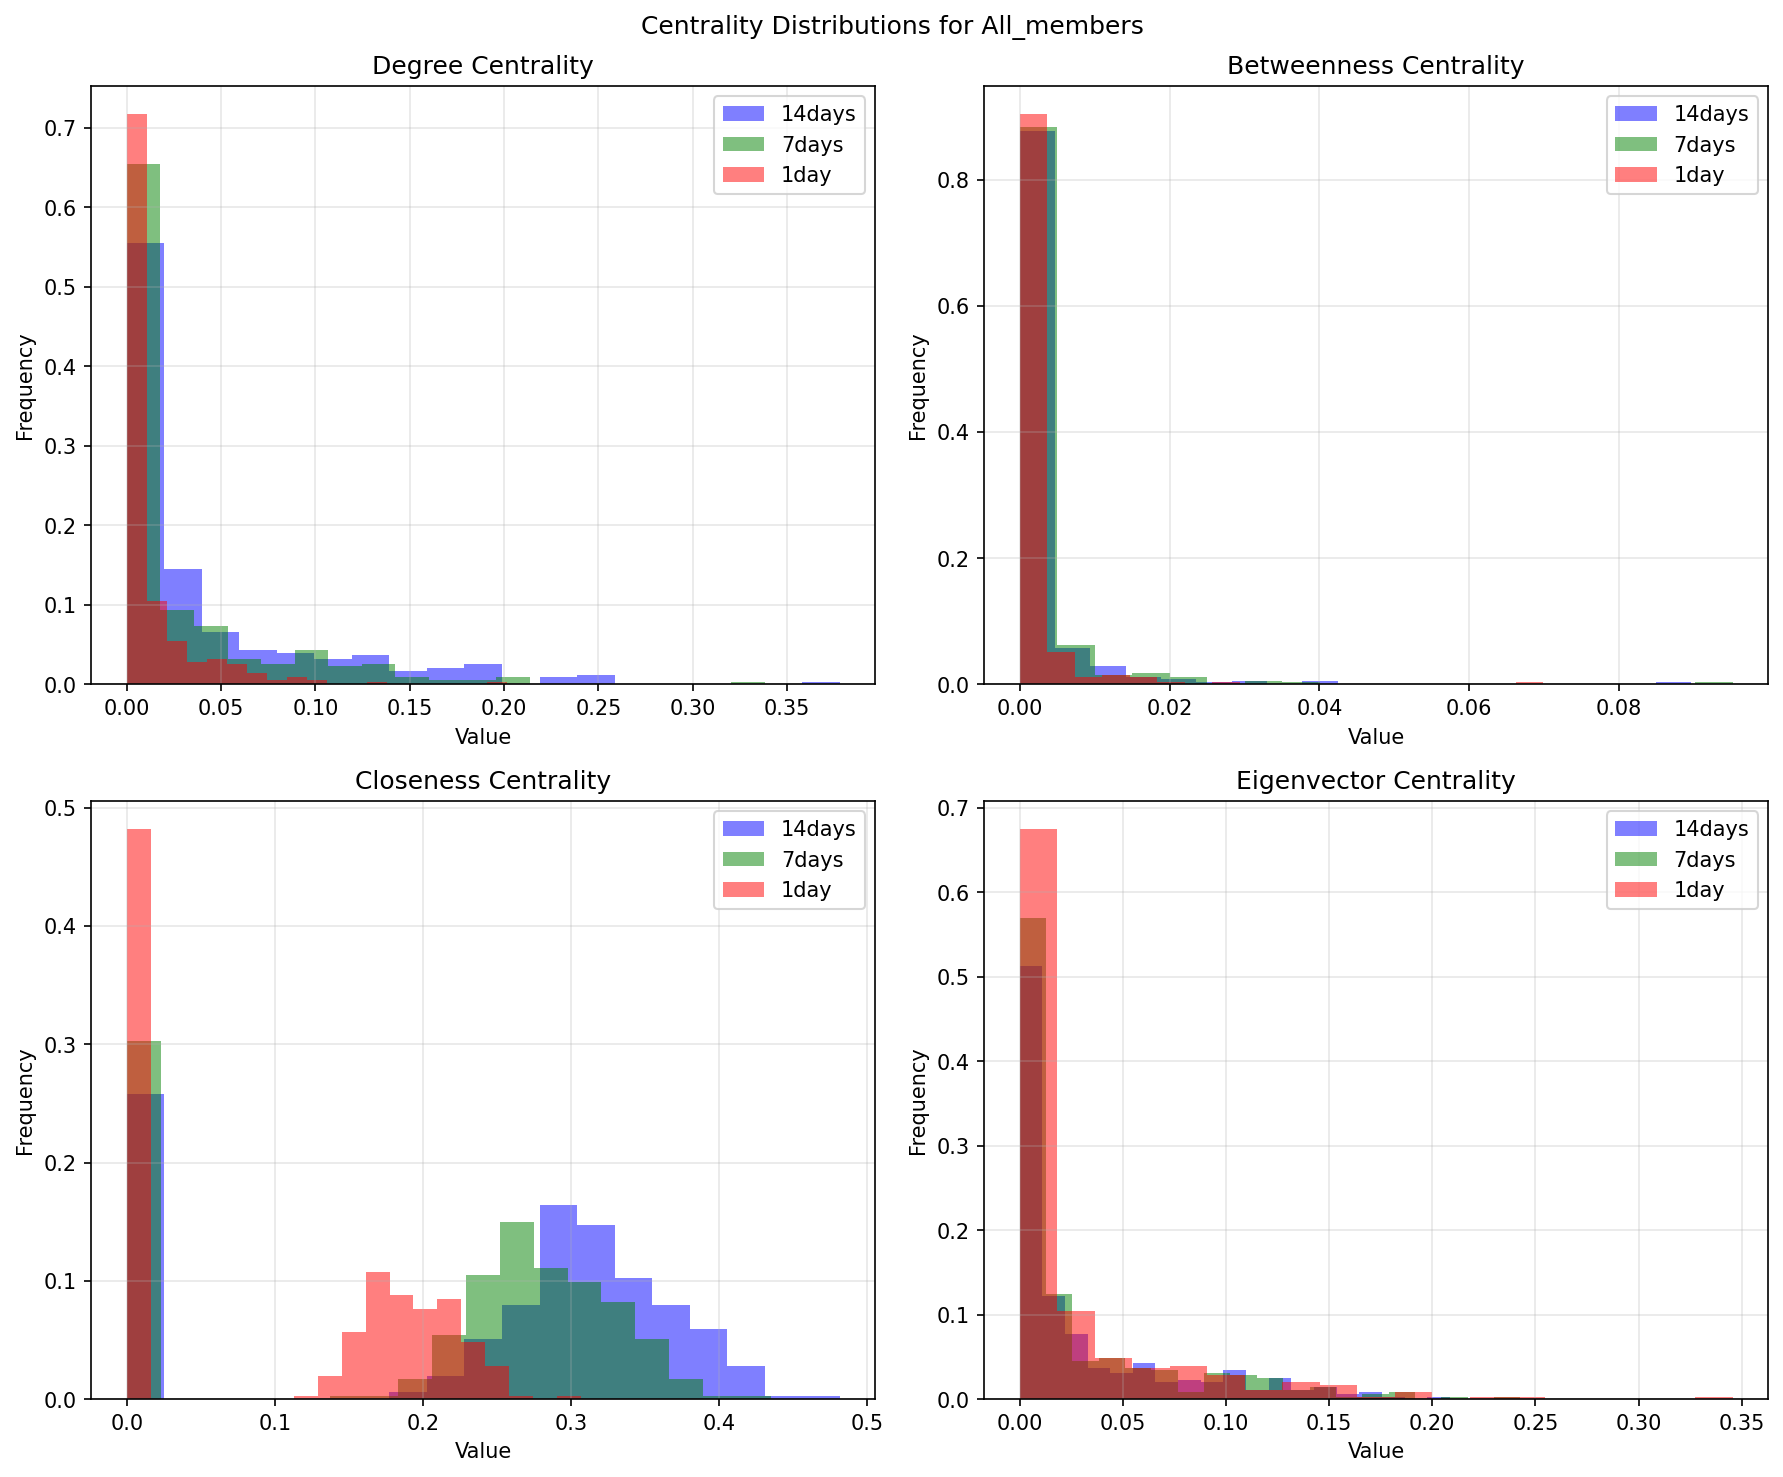

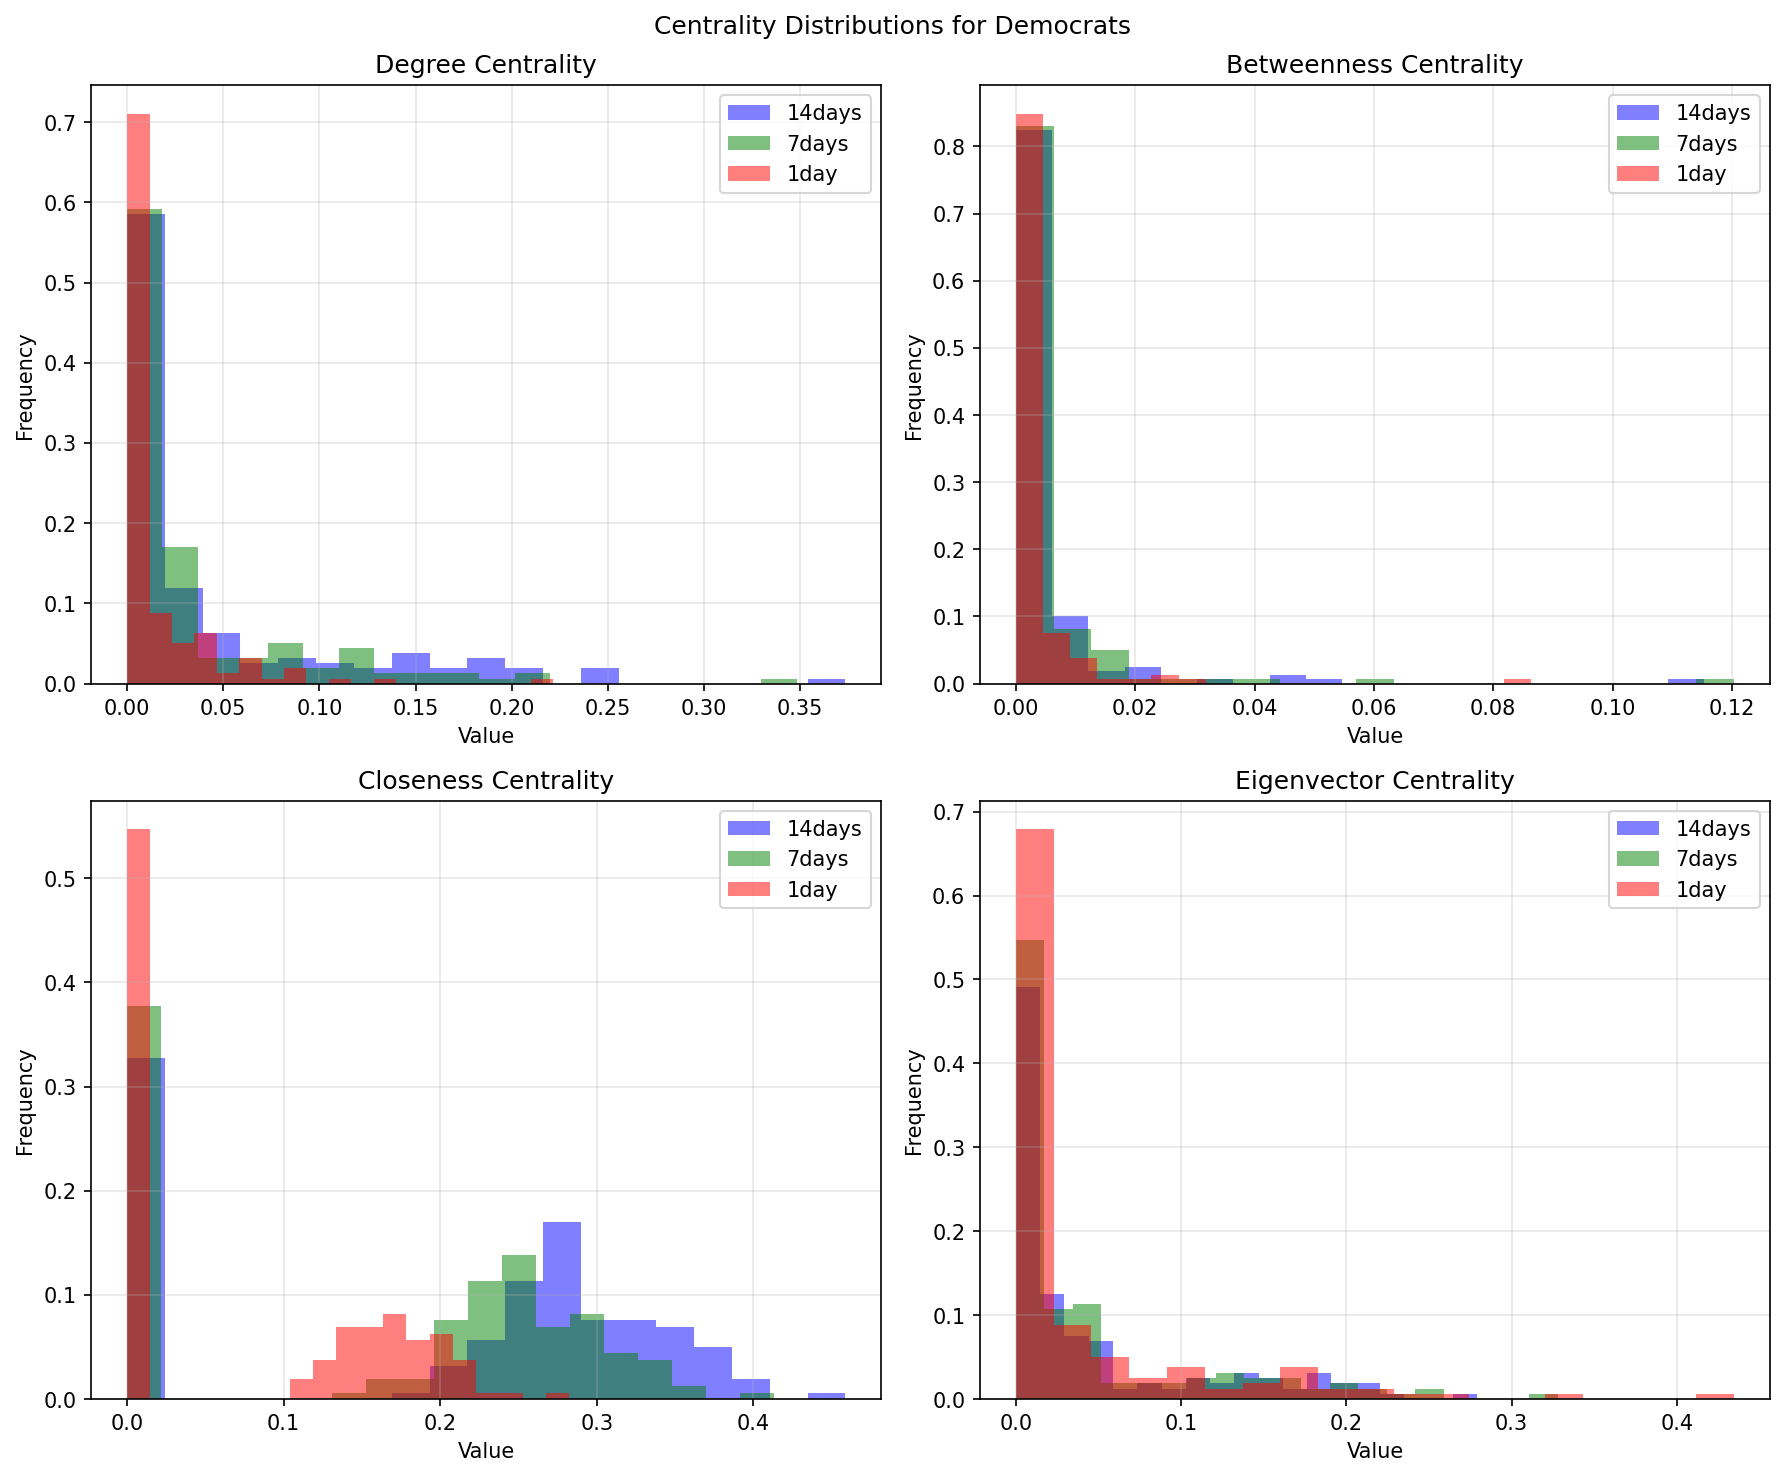

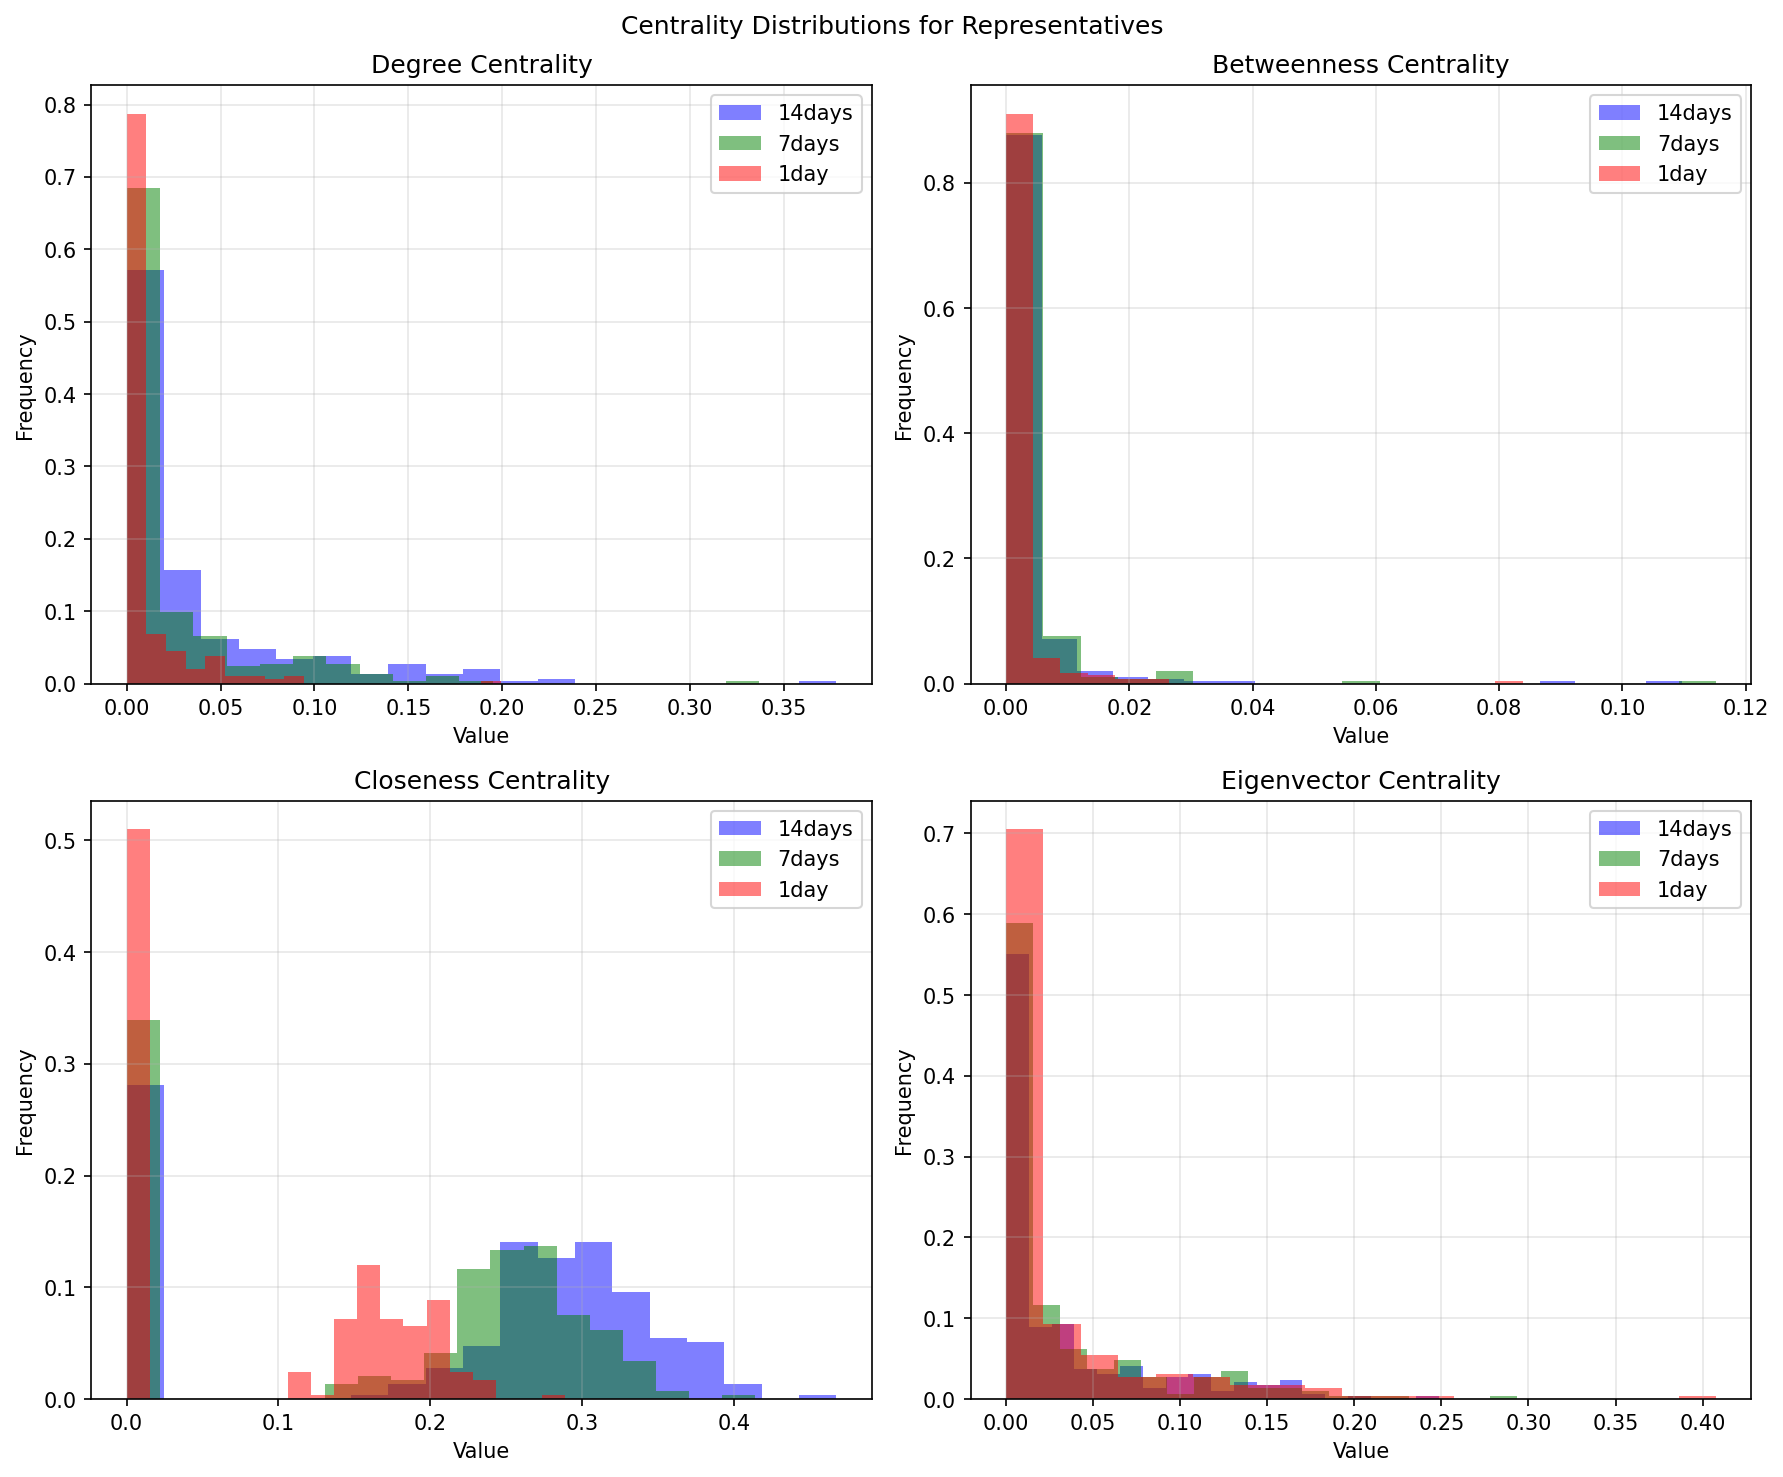

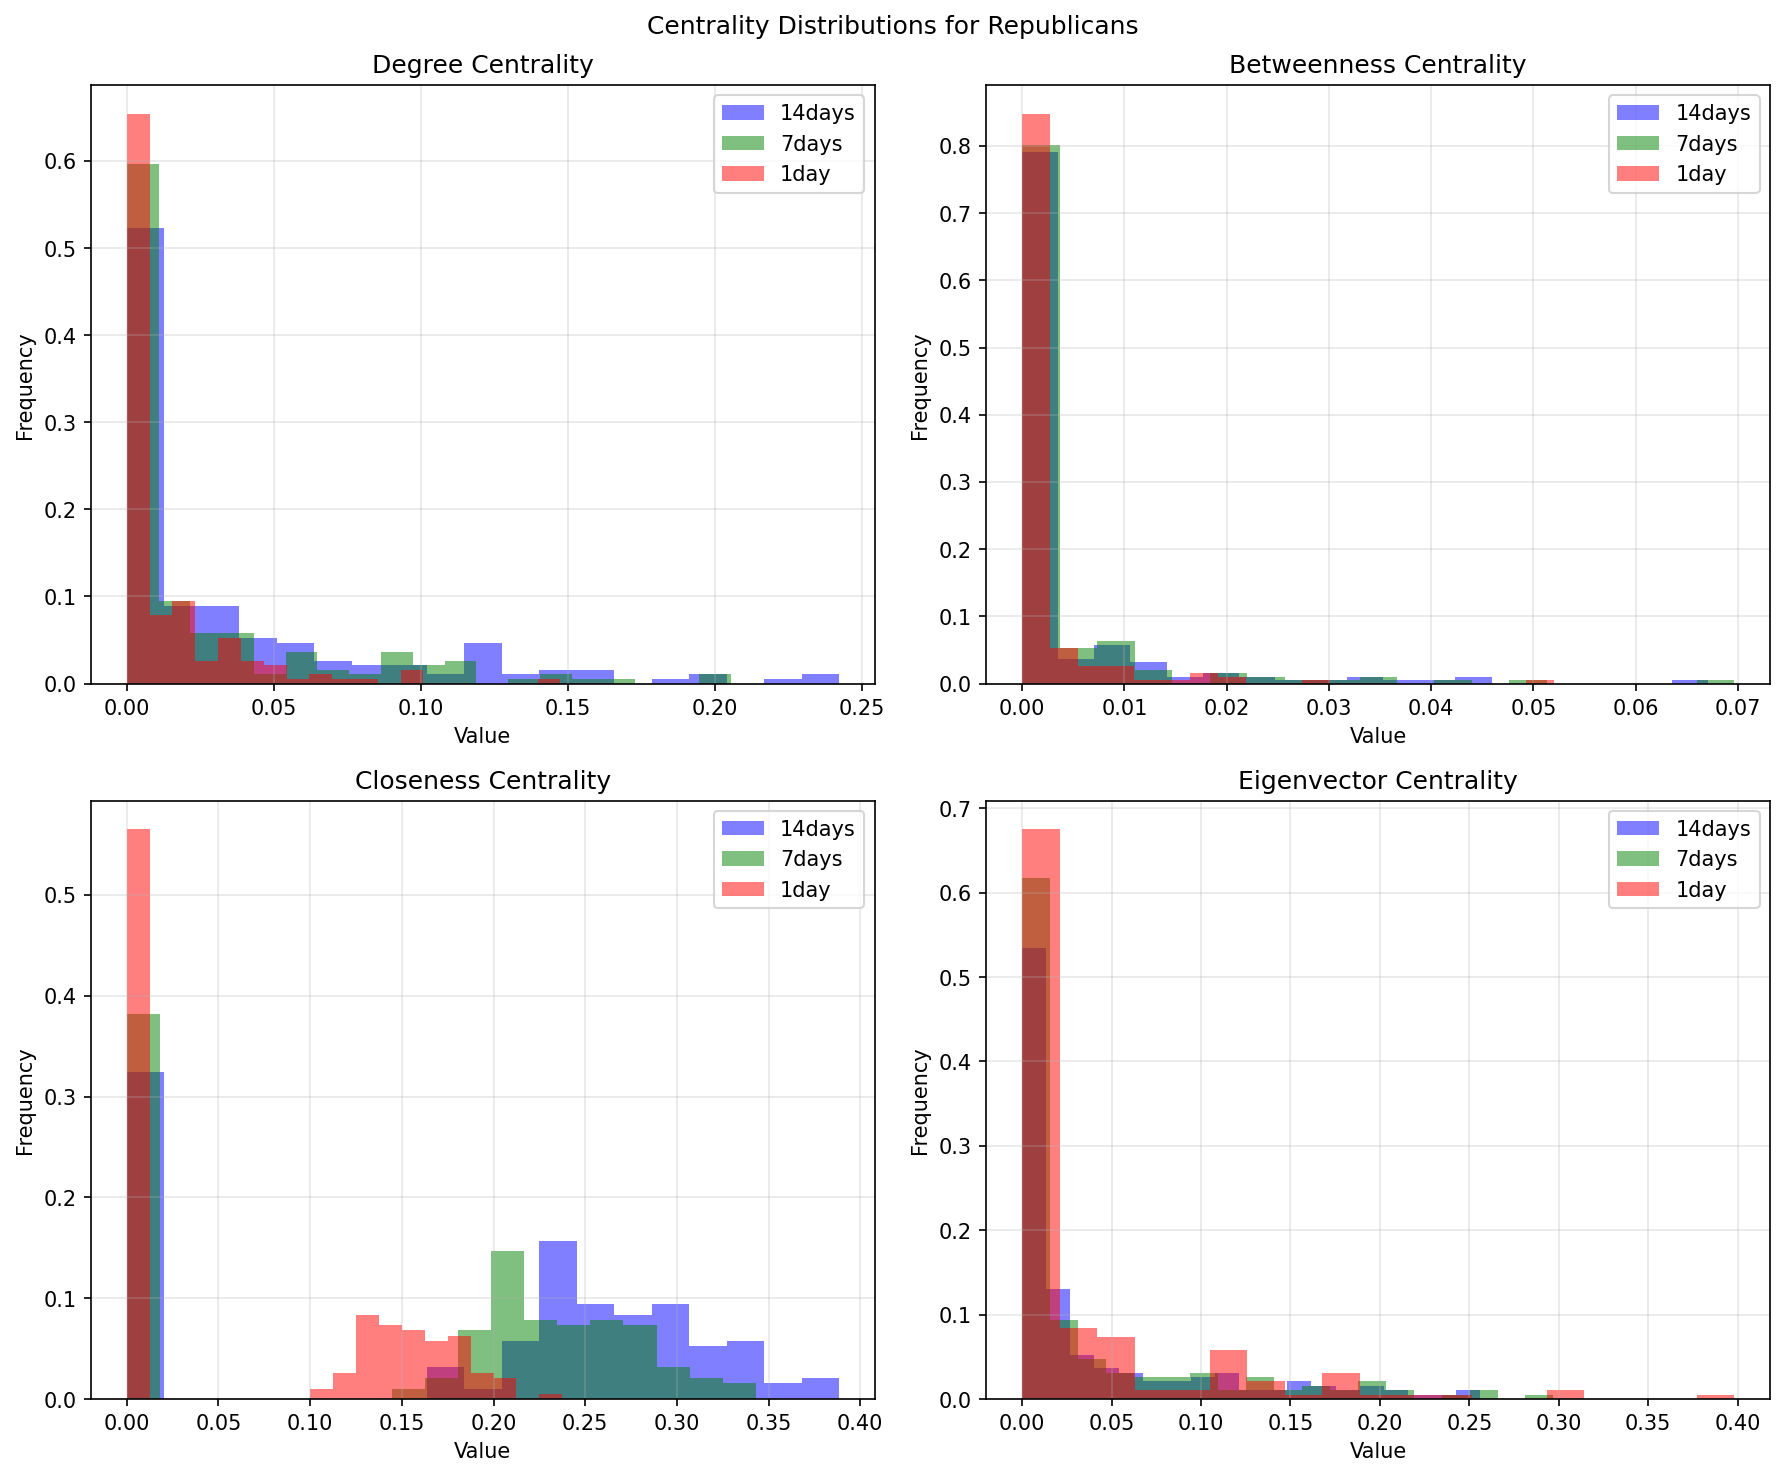

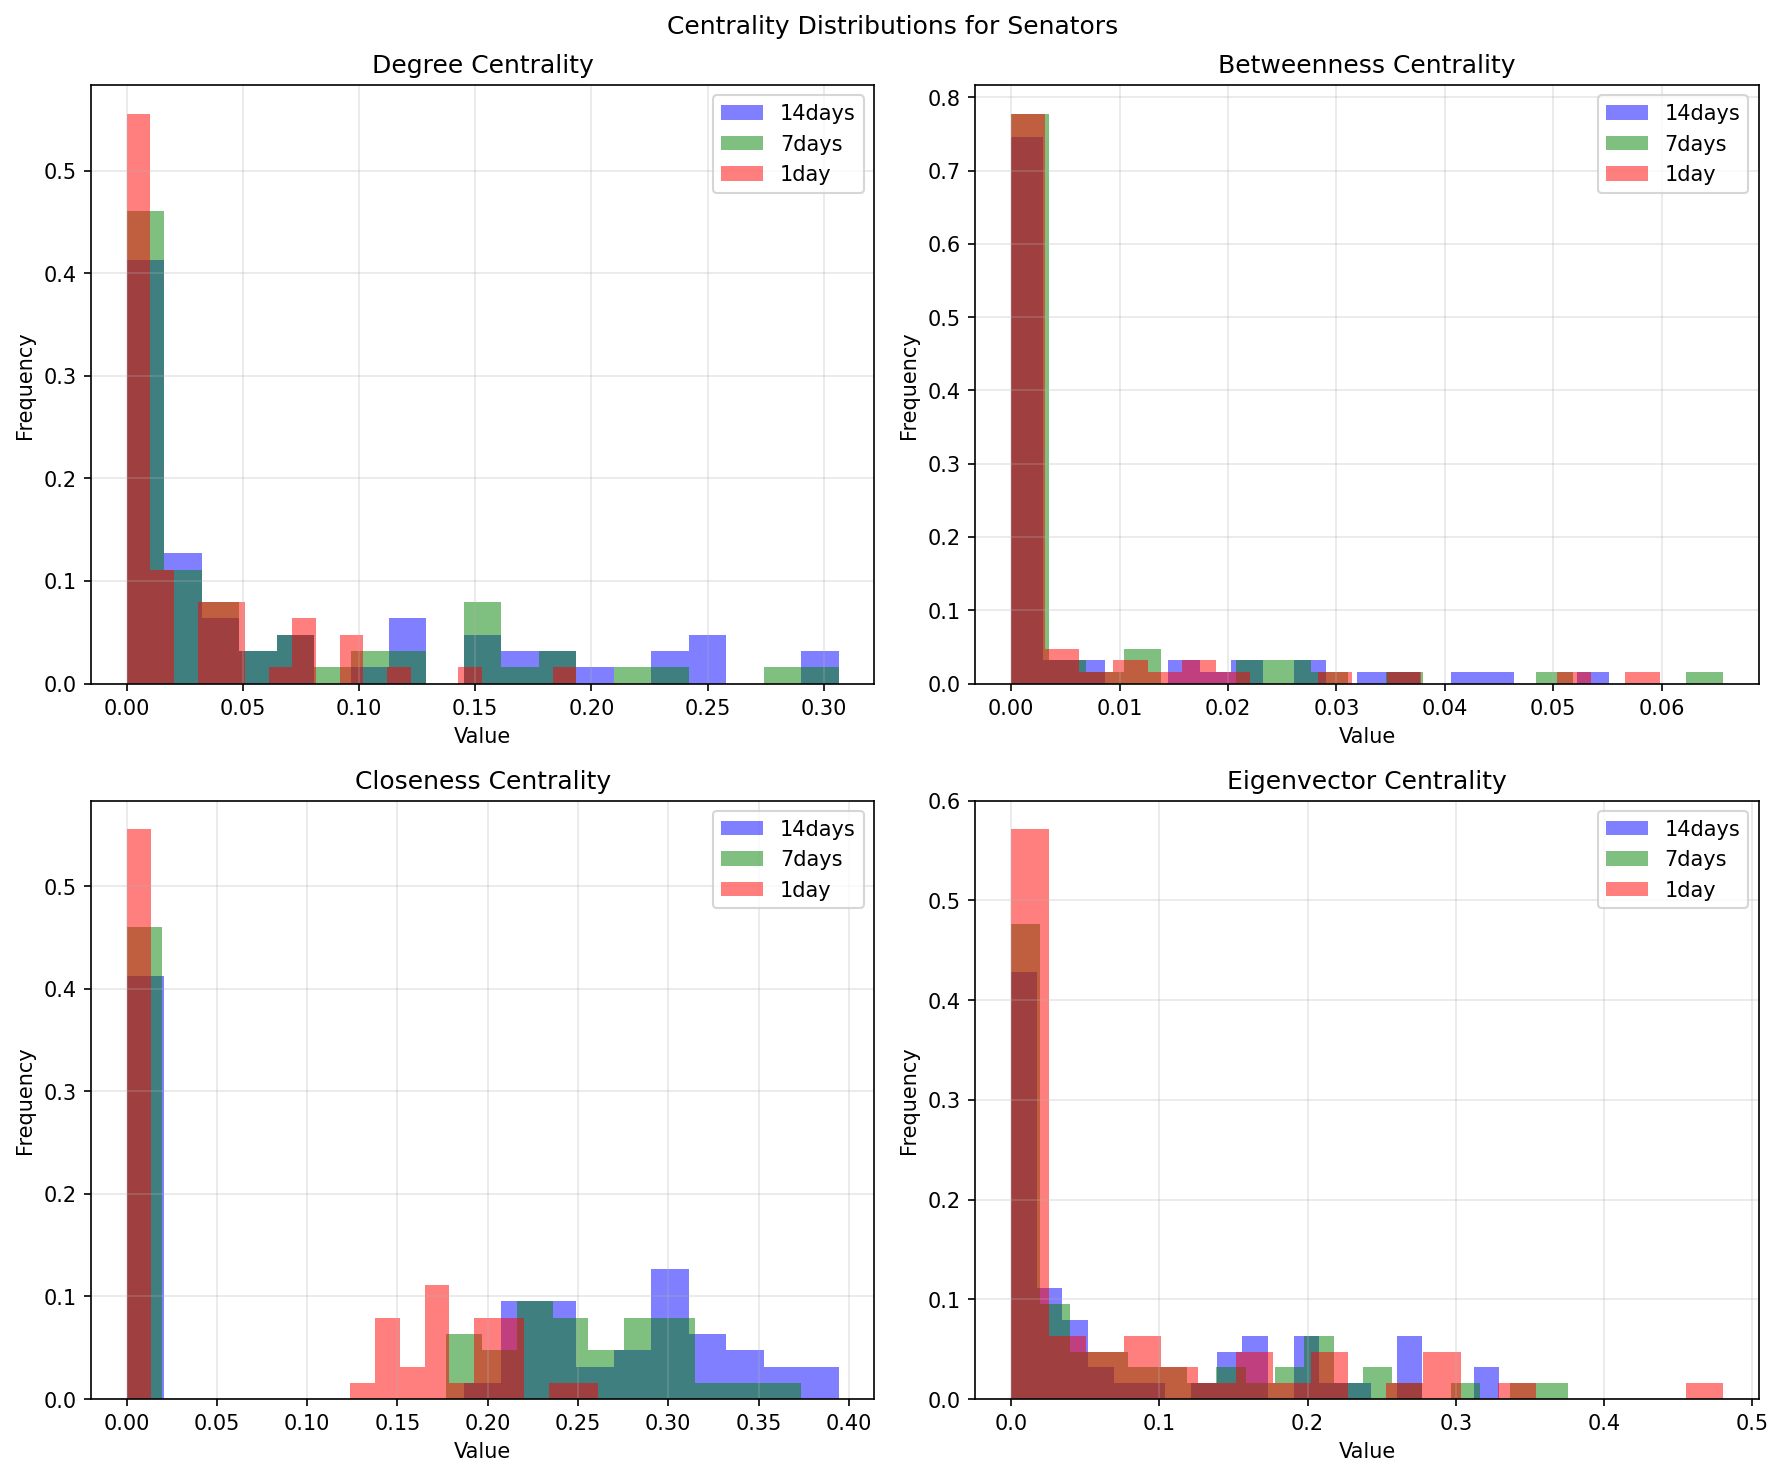

In [4]:
import matplotlib.pyplot as plt
import numpy as np

colors = {
    '14days': 'blue',
    '7days': 'green',
    '1day': 'red'
}

centrality_titles = [
    ("degree", "Degree Centrality"),
    ("betweenness", "Betweenness Centrality"),
    ("closeness", "Closeness Centrality"),
    ("eigenvector", "Eigenvector Centrality"),
]

graph_groups = {
    'All_members': ['All_members_14days', 'All_members_7days', 'All_members_1day'],
    'Democrats': ['Democrat_members_14days', 'Democrat_members_7days', 'Democrat_members_1day'],
    'Representatives': ['Representatives_14days', 'Representatives_7days', 'Representatives_1day'],
    'Republicans': ['Republican_members_14days', 'Republican_members_7days', 'Republican_members_1day'],
    'Senators': ['Senators_14days', 'Senators_7days', 'Senators_1day']
}

all_centrality_data = {
    group: {key: {tf: [] for tf in colors.keys()} for key, _ in centrality_titles} 
    for group in graph_groups.keys()
}

all_sorted_degree_dicts = {}
all_sorted_betwns_dicts = {}
all_sorted_closen_dicts = {}
all_sorted_eigenv_dicts = {}

for dataset_file, dataset_label in datasets:
    G = nx.read_gml(dataset_file, label="id")

    (
        degree, betwns, closen, eigenv, 
        degree_dic, betwns_dic, closen_dic, eigenv_dic
    ) = calculate_centralities(G)

    all_sorted_degree_dicts[dataset_label] = dict(sorted(degree_dic.items(), key=lambda item: item[1], reverse=True))
    all_sorted_betwns_dicts[dataset_label] = dict(sorted(betwns_dic.items(), key=lambda item: item[1], reverse=True))
    all_sorted_closen_dicts[dataset_label] = dict(sorted(closen_dic.items(), key=lambda item: item[1], reverse=True))
    all_sorted_eigenv_dicts[dataset_label] = dict(sorted(eigenv_dic.items(), key=lambda item: item[1], reverse=True))

    group = next((key for key in graph_groups if dataset_label in graph_groups[key]), None)
    timeframe = '14days' if '14days' in dataset_label else '7days' if '7days' in dataset_label else '1day'

    if group:
        for key, data in {
            'degree': degree,
            'betweenness': betwns,
            'closeness': closen,
            'eigenvector': eigenv
        }.items():
            all_centrality_data[group][key][timeframe].extend(data)

for group, group_centralities in all_centrality_data.items():
    fig, axs = plt.subplots(2, 2, figsize=(12, 10), dpi=150)
    fig.suptitle(f"Centrality Distributions for {group}")

    for ax, (centrality_key, centrality_title) in zip(axs.flatten(), centrality_titles):
        for timeframe, color in colors.items():
            data = np.array(group_centralities[centrality_key][timeframe])
            if len(data) > 0:
                minimum = np.min(data)
                maximum = np.max(data)
                bins = np.linspace(minimum, maximum, num=20)

                counts, bins = np.histogram(data, bins)
                normalized_counts = counts / sum(counts)

                ax.bar(bins[:-1], normalized_counts, width=np.diff(bins), align="edge", 
                       alpha=0.5, label=f"{timeframe}", color=color)

        ax.set_xlabel("Value")
        ax.set_ylabel("Frequency")
        ax.set_title(centrality_title)
        ax.grid(True, alpha=0.3)
        ax.legend()

    fig.tight_layout()
    plt.show()


As we can see across all the centrality metrics (Degree, Betweenness, Closeness, and Eigenvector), the distributions are highly skewed. That means that most of the Congress members (nodes) have low centralities values except few members that exhibit significantly higher values. These highly influential nodes dominate the network and play critical roles in its structure. 

**All members**
- Degree Centrality: In the short timeframe most of people do not have many direct connections, with only few members have higher of them. The newtork can be characterized as sparse. In the 7-day time frame more people are making connections and over the longest timeframe greater number of members have higher connections, showing that the network becomes denser and more inetractive. 

- Betweenness Centrality: Very few members act as a bridge meaning most people arent important for connecting different groups over short period of time. In longer preriods we can see that some members start playing more bridging roles, meaning longer interaction periods  create more connections between groups. However only a handful play significant roles connecting different parts of the network.

- Closeness Centrality:
Most members are far apart from others with limited reachability in short time frames. When we have longer ones the network starts to become more and more connected and members are closer to each other .

- Eigenvector Centrality: Most members have have little influence because they’re connected to people who aren’t influential themselves. In 7-days a few members start becoming more influential as they connect with others who are well-connected and in 14-days the influence grows even more for key members, as some become strongly tied to the most important people in the network.

In general, as the timeframe increases, members build more connections and become closer to others. Over time, certain people stand out as more connected, more influential, or better at bridging gaps in the network. By the 14-day mark, the network is more tightly connected, and members are better integrated.


**Democrat members**
- Degree Centrality: Most Democratic members have very few direct connections, with only a small number standing out. This suggests that trading activity or interactions are limited over a short period (1-day).There is a slight increase in the number of connections for some members, meaning trading activity or interactions expand as time increases (7-days) and for a timeframe of 14-days more members develop higher connections, and the spread of degree centrality increases. This indicates that over a longer timeframe, more Democratic members interact with a broader range of individuals.

- Betweenness Centrality:
Very few members have significant betweenness centrality, suggesting limited bridging roles over this short period. Some members start acting as more important connectors between groups, showing an increase in their role as intermediaries when the timeframe becomes longer and in (14-days) a few members start to play substantial bridging roles, which indicates that certain individuals become more crucial in connecting groups over time.

- Closeness Centrality:
Most members are far from others in the network, showing limited overall access to other members. The distribution starts shifting slightly higher, meaning members are becoming more interconnected and closer to each other.
Members are significantly closer to each other in the network in (14-days), showing stronger integration and easier communication over the longer timeframe.

- Eigenvector Centrality:
Most Democratic members have low influence since their connections are not with highly influential nodes yet. A few members start to gain more influence, reflecting connections with more important individuals and for some members grows further, highlighting the emergence of key players who are tied to other influential members for longer timeframes(14 days).

In general, as the timeframe increases, Democratic members form more connections and become more integrated into the network. Specific members become more influential and act as crucial connectors between groups. Members generally become closer to each other, making the network more cohesive and efficient over longer periods.



**Representatives**
- Degree Centrality:
Most Representatives have very few direct connections, with only a small fraction being well-connected. The overall network is sparse.Slightly more Representatives gain connections, showing moderate growth in interactions over a week. The spread in connections increases further, meaning more Representatives are interacting with others as the timeframe extends. This indicates a more interconnected network over time.

- Betweenness Centrality:
Few Representatives play a significant bridging role, suggesting limited coordination or interaction between separate groups in the short timeframe. Some Representatives begin to act as bridges, connecting otherwise separate groups. This shows an increase in intergroup interactions.A small number of Representatives play significant bridging roles, becoming more critical in connecting various parts of the network over time.

- Closeness Centrality:
Most Representatives are relatively far from others in the network, showing limited accessibility or integration. Members become slightly closer to others, showing better network cohesion over a week.
Representatives are much closer to each other in the network, meaning the network becomes more integrated and members can more easily reach others.

- Eigenvector Centrality:
Most Representatives have low influence since their connections are not with highly connected or influential members yet.A few Representatives start gaining influence, suggesting stronger ties with key players in the network. Some Representatives become highly influential, indicating the emergence of key players connected to other influential individuals.

As the network grows over time, Representatives are better able to reach others, making the network more cohesive.


**Republican members**
- Degree Centrality:
Most Republican members have very few connections, with only a few standing out as more connected. The network appears sparse over the shortest timeframe.A slight increase in connectivity is observed, with more members forming connections over time and the spread of connections increases further, indicating that more members are interacting with others as time passes, leading to a denser and more interactive network.

 - Betweenness Centrality:
Very few members have notable betweenness centrality, meaning bridging roles are limited over the short timeframe. A few members begin to act as more important bridges between groups, indicating increased intergroup connections. Some members emerge as key connectors, taking on substantial bridging roles in the network as more interactions occur over time.

- Closeness Centrality:
Most members are relatively distant from others in the network, showing low overall accessibility. Accessibility improves slightly, as members become better connected. Members are closer to each other in the network, indicating greater integration and easier reachability over the longest timeframe.

- Eigenvector Centrality:
Most members have low eigenvector centrality, meaning they are not yet connected to influential individuals. A few members start gaining influence by connecting with more important individuals in the network. Key influencers emerge, as some members form strong ties with other influential nodes, reflecting an increase in overall influence within the network.

The Republican members’ trading networks evolve over time, becoming denser and more organized, with a few individuals emerging as central figures. 


**Senators**
- Degree Centrality:
Most Senators have very few connections, with only a small fraction having slightly more, indicating limited interactions over the short period.Connectivity improves as some Senators gain more connections, reflecting increased interactions over a week.The spread of connections increases further, with more Senators forming additional connections over the longer timeframe. This indicates a denser and more interactive network over time.

- Betweenness Centrality:
Few Senators play significant bridging roles, as most betweenness centrality values are close to zero, reflecting limited intergroup connectivity in this short period. A few Senators start emerging as bridges, connecting different groups within the network and some of them assume critical bridging roles, becoming important connectors as interactions across groups increase over the longer period.

- Closeness Centrality:
Most Senators are relatively distant from others, with lower closeness values showing limited overall accessibility. Senators become slightly closer to others, reflecting better accessibility as the network integrates over a week.
Closeness centrality values shift higher, indicating Senators are much more accessible within the network, with greater integration over the longer timeframe.

- Eigenvector Centrality:
Most Senators have very low influence, as they are not yet connected to other well-connected or influential members. Some Senators gain more influence, as they start connecting with key players in the network. A few Senators emerge as highly influential nodes, connected to other influential members and playing critical roles in the network’s structure.


As the timeframe extends, the network becomes denser and more interconnected, with certain individuals, emerging as key players who bridge groups, enhance accessibility, and increase overall influence within the evolving structure.

## Plot comparison of pairs 


In [5]:
plot_pairs = [
    ('degree', 'betweenness', 'Degree', 'Betweenness'),
    ('degree', 'closeness', 'Degree', 'Closeness'),
    ('degree', 'eigenvector', 'Degree', 'Eigenvector'),
    ('betweenness', 'closeness', 'Betweenness', 'Closeness'),
    ('betweenness', 'eigenvector', 'Betweenness', 'Eigenvector'),
    ('closeness', 'eigenvector', 'Closeness', 'Eigenvector'),

]

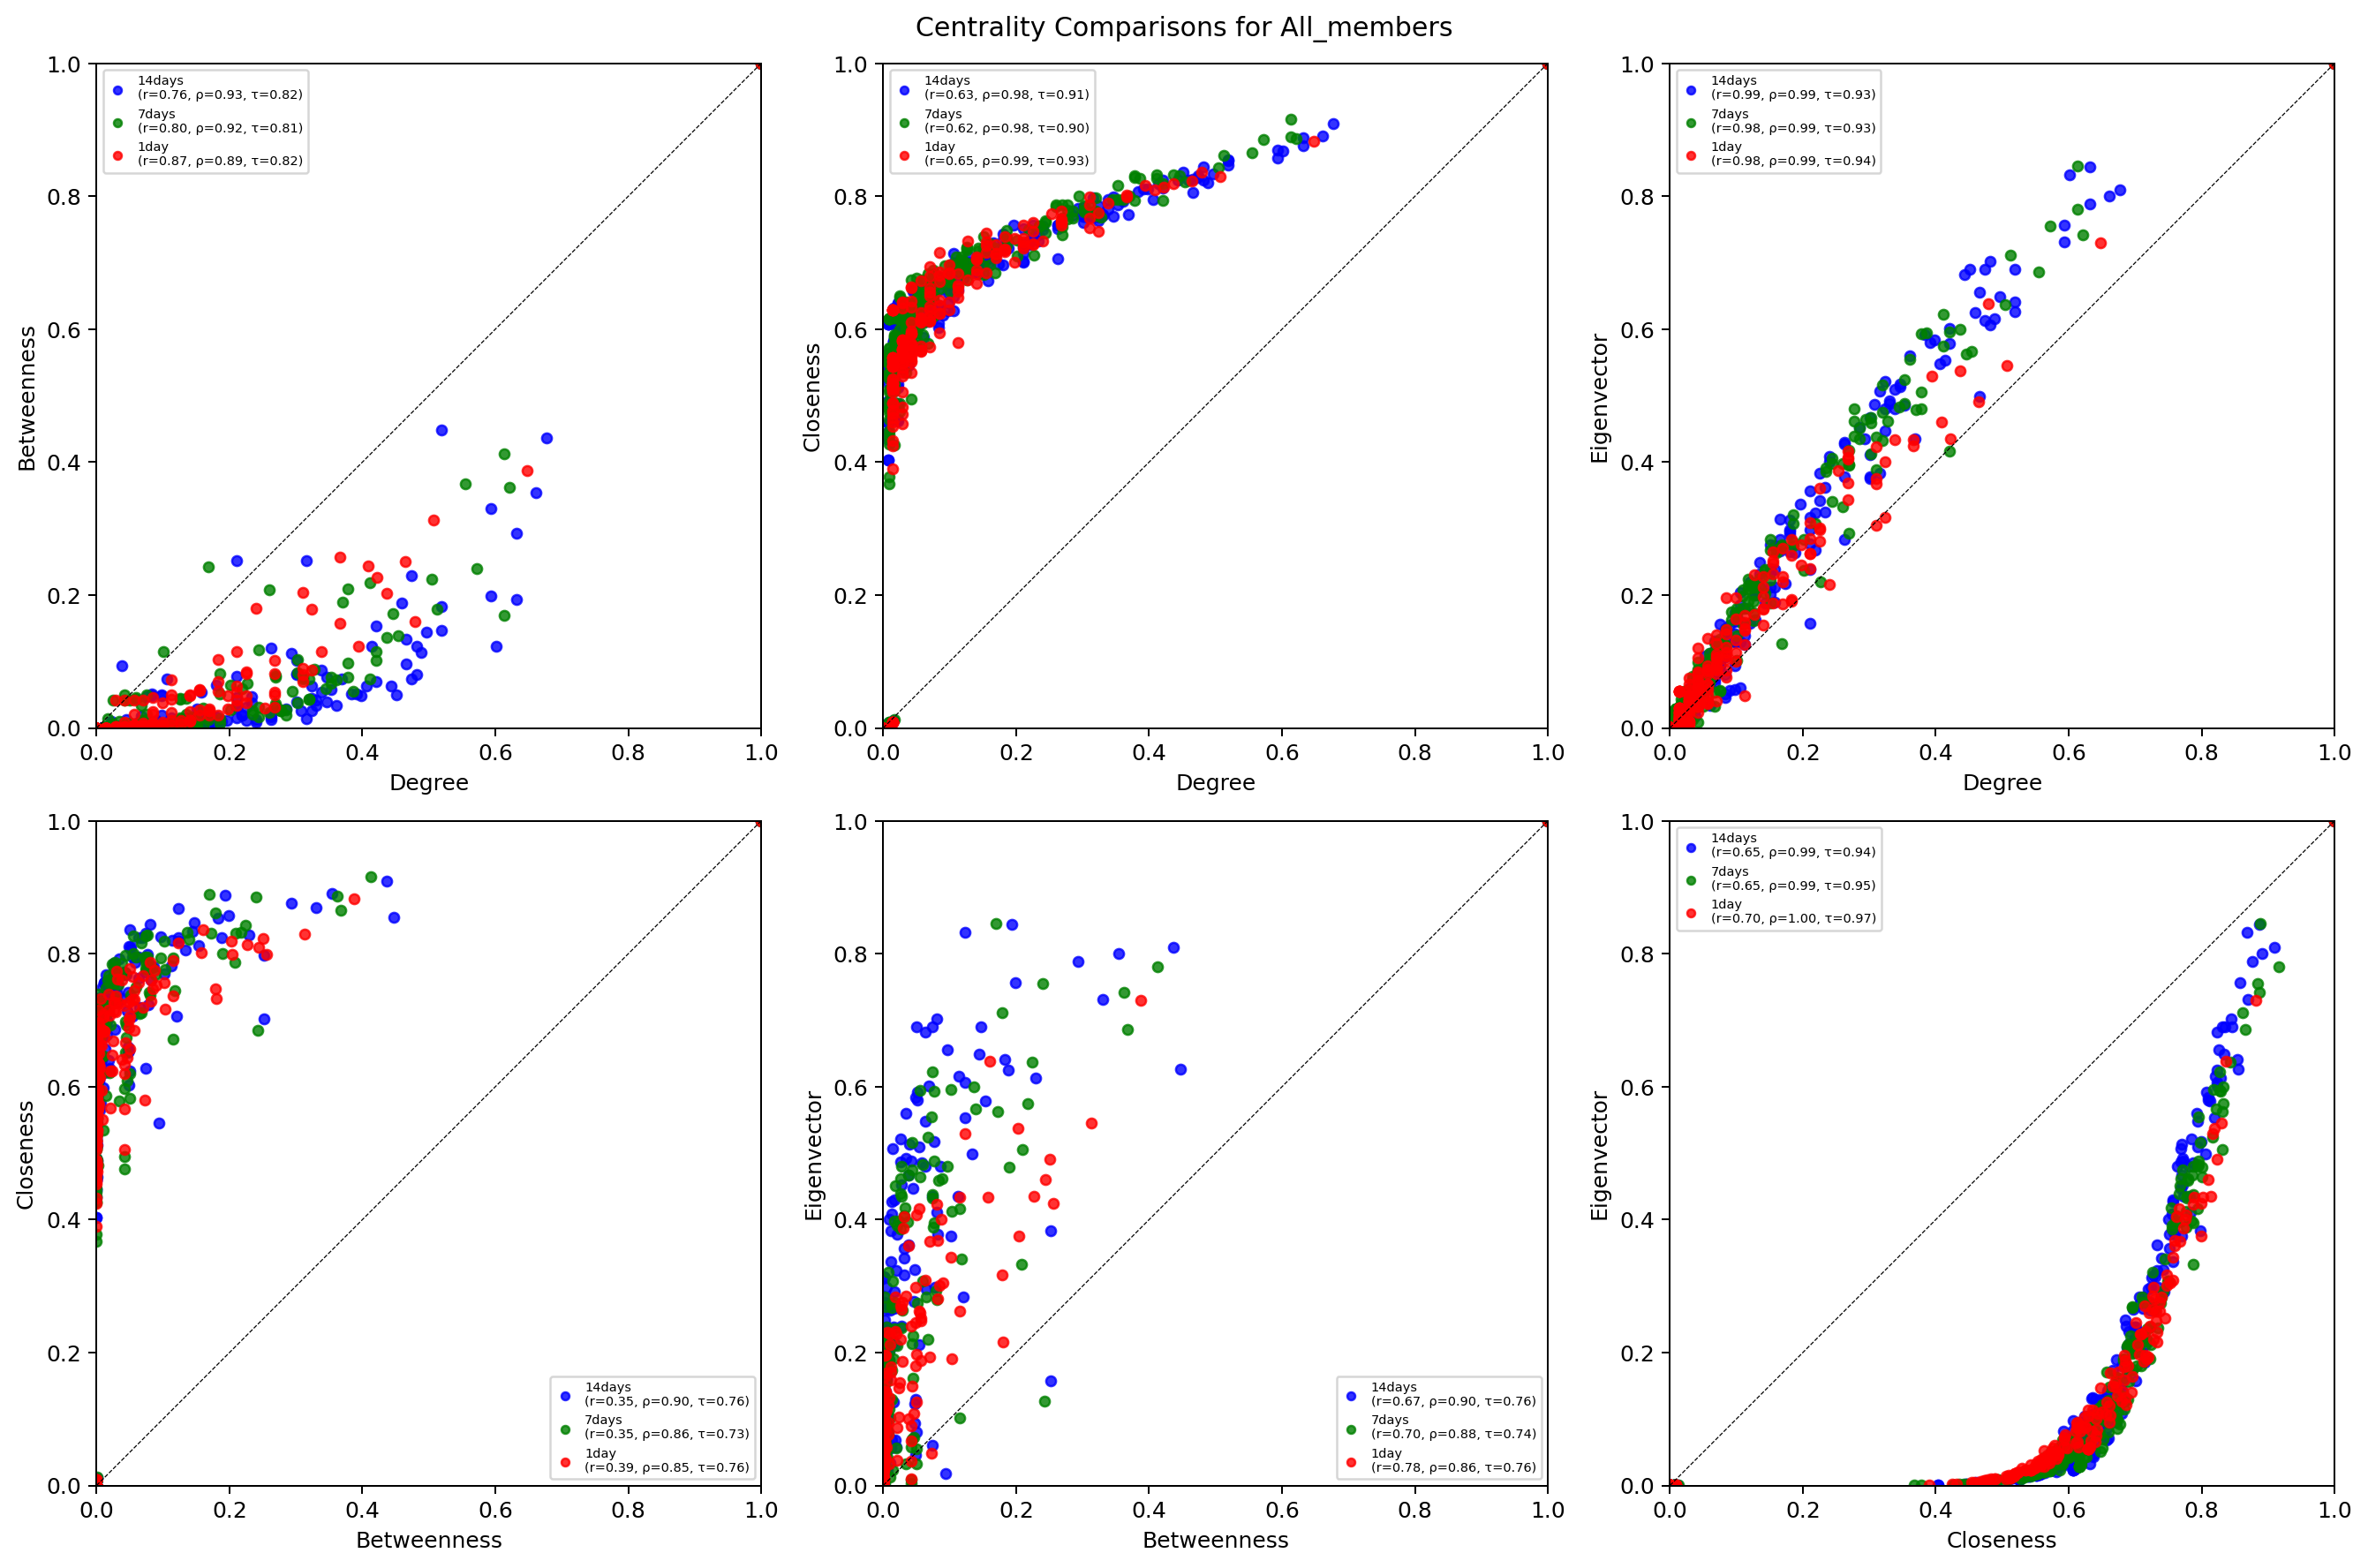

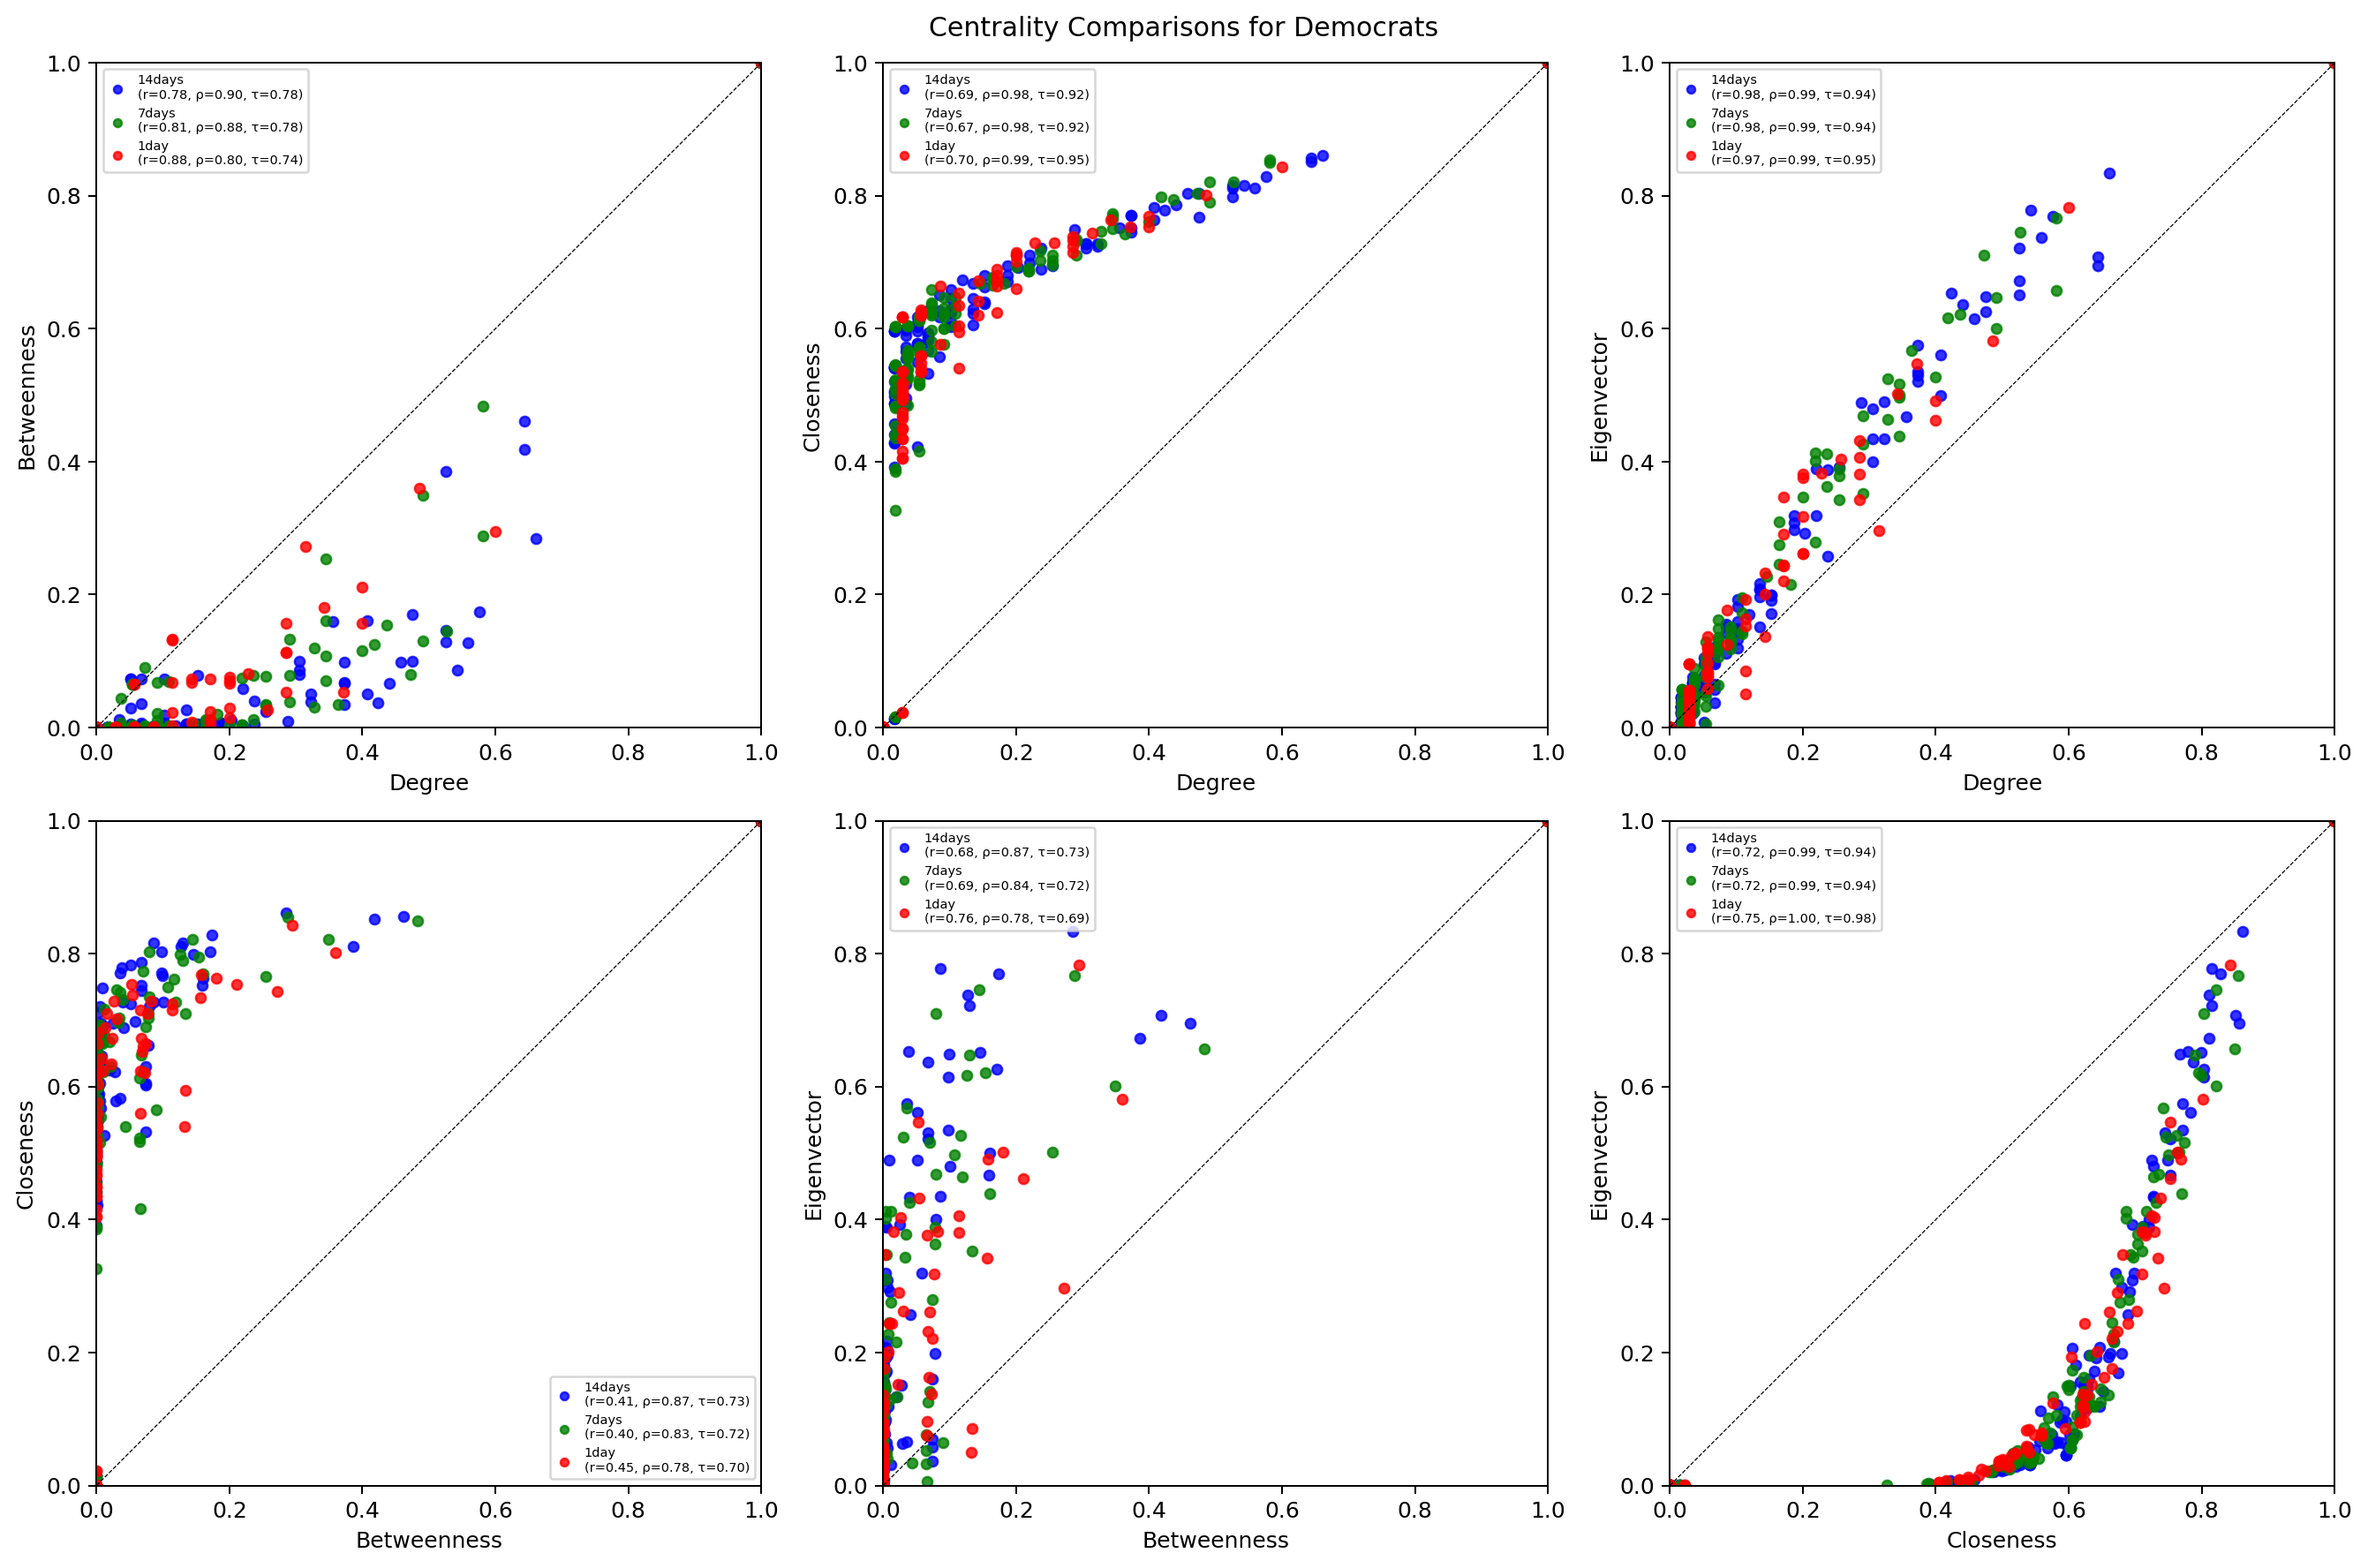

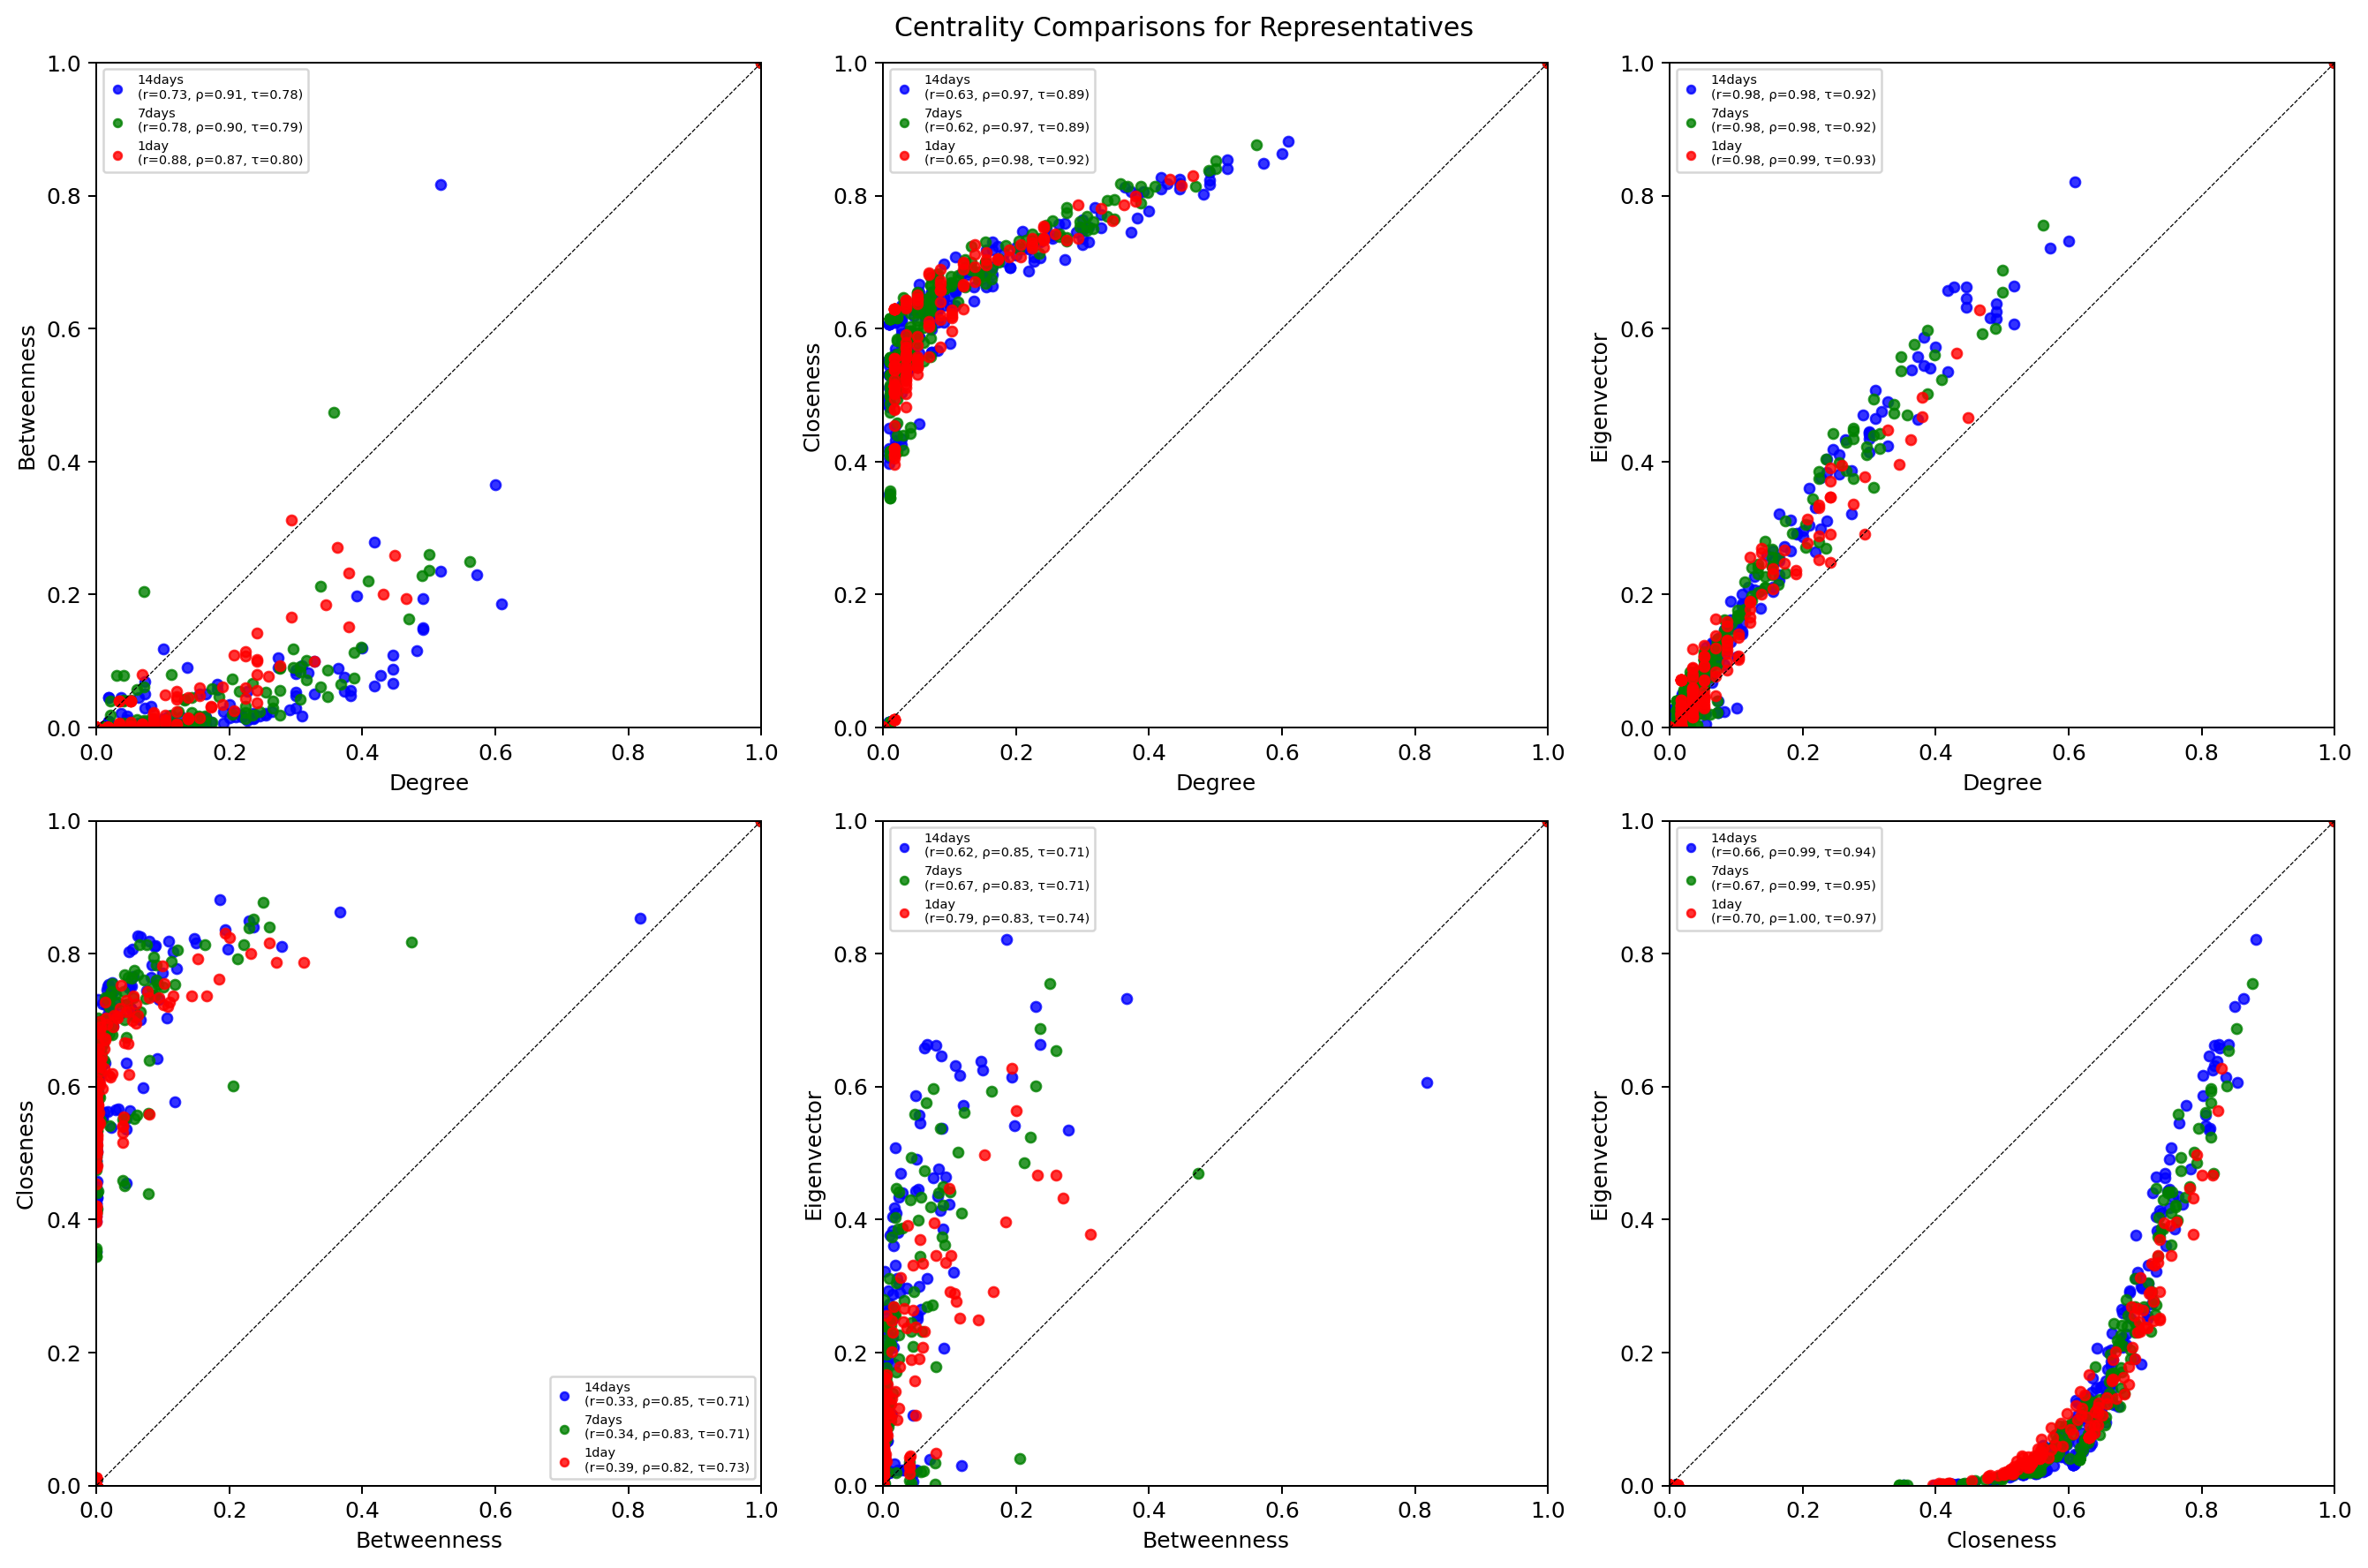

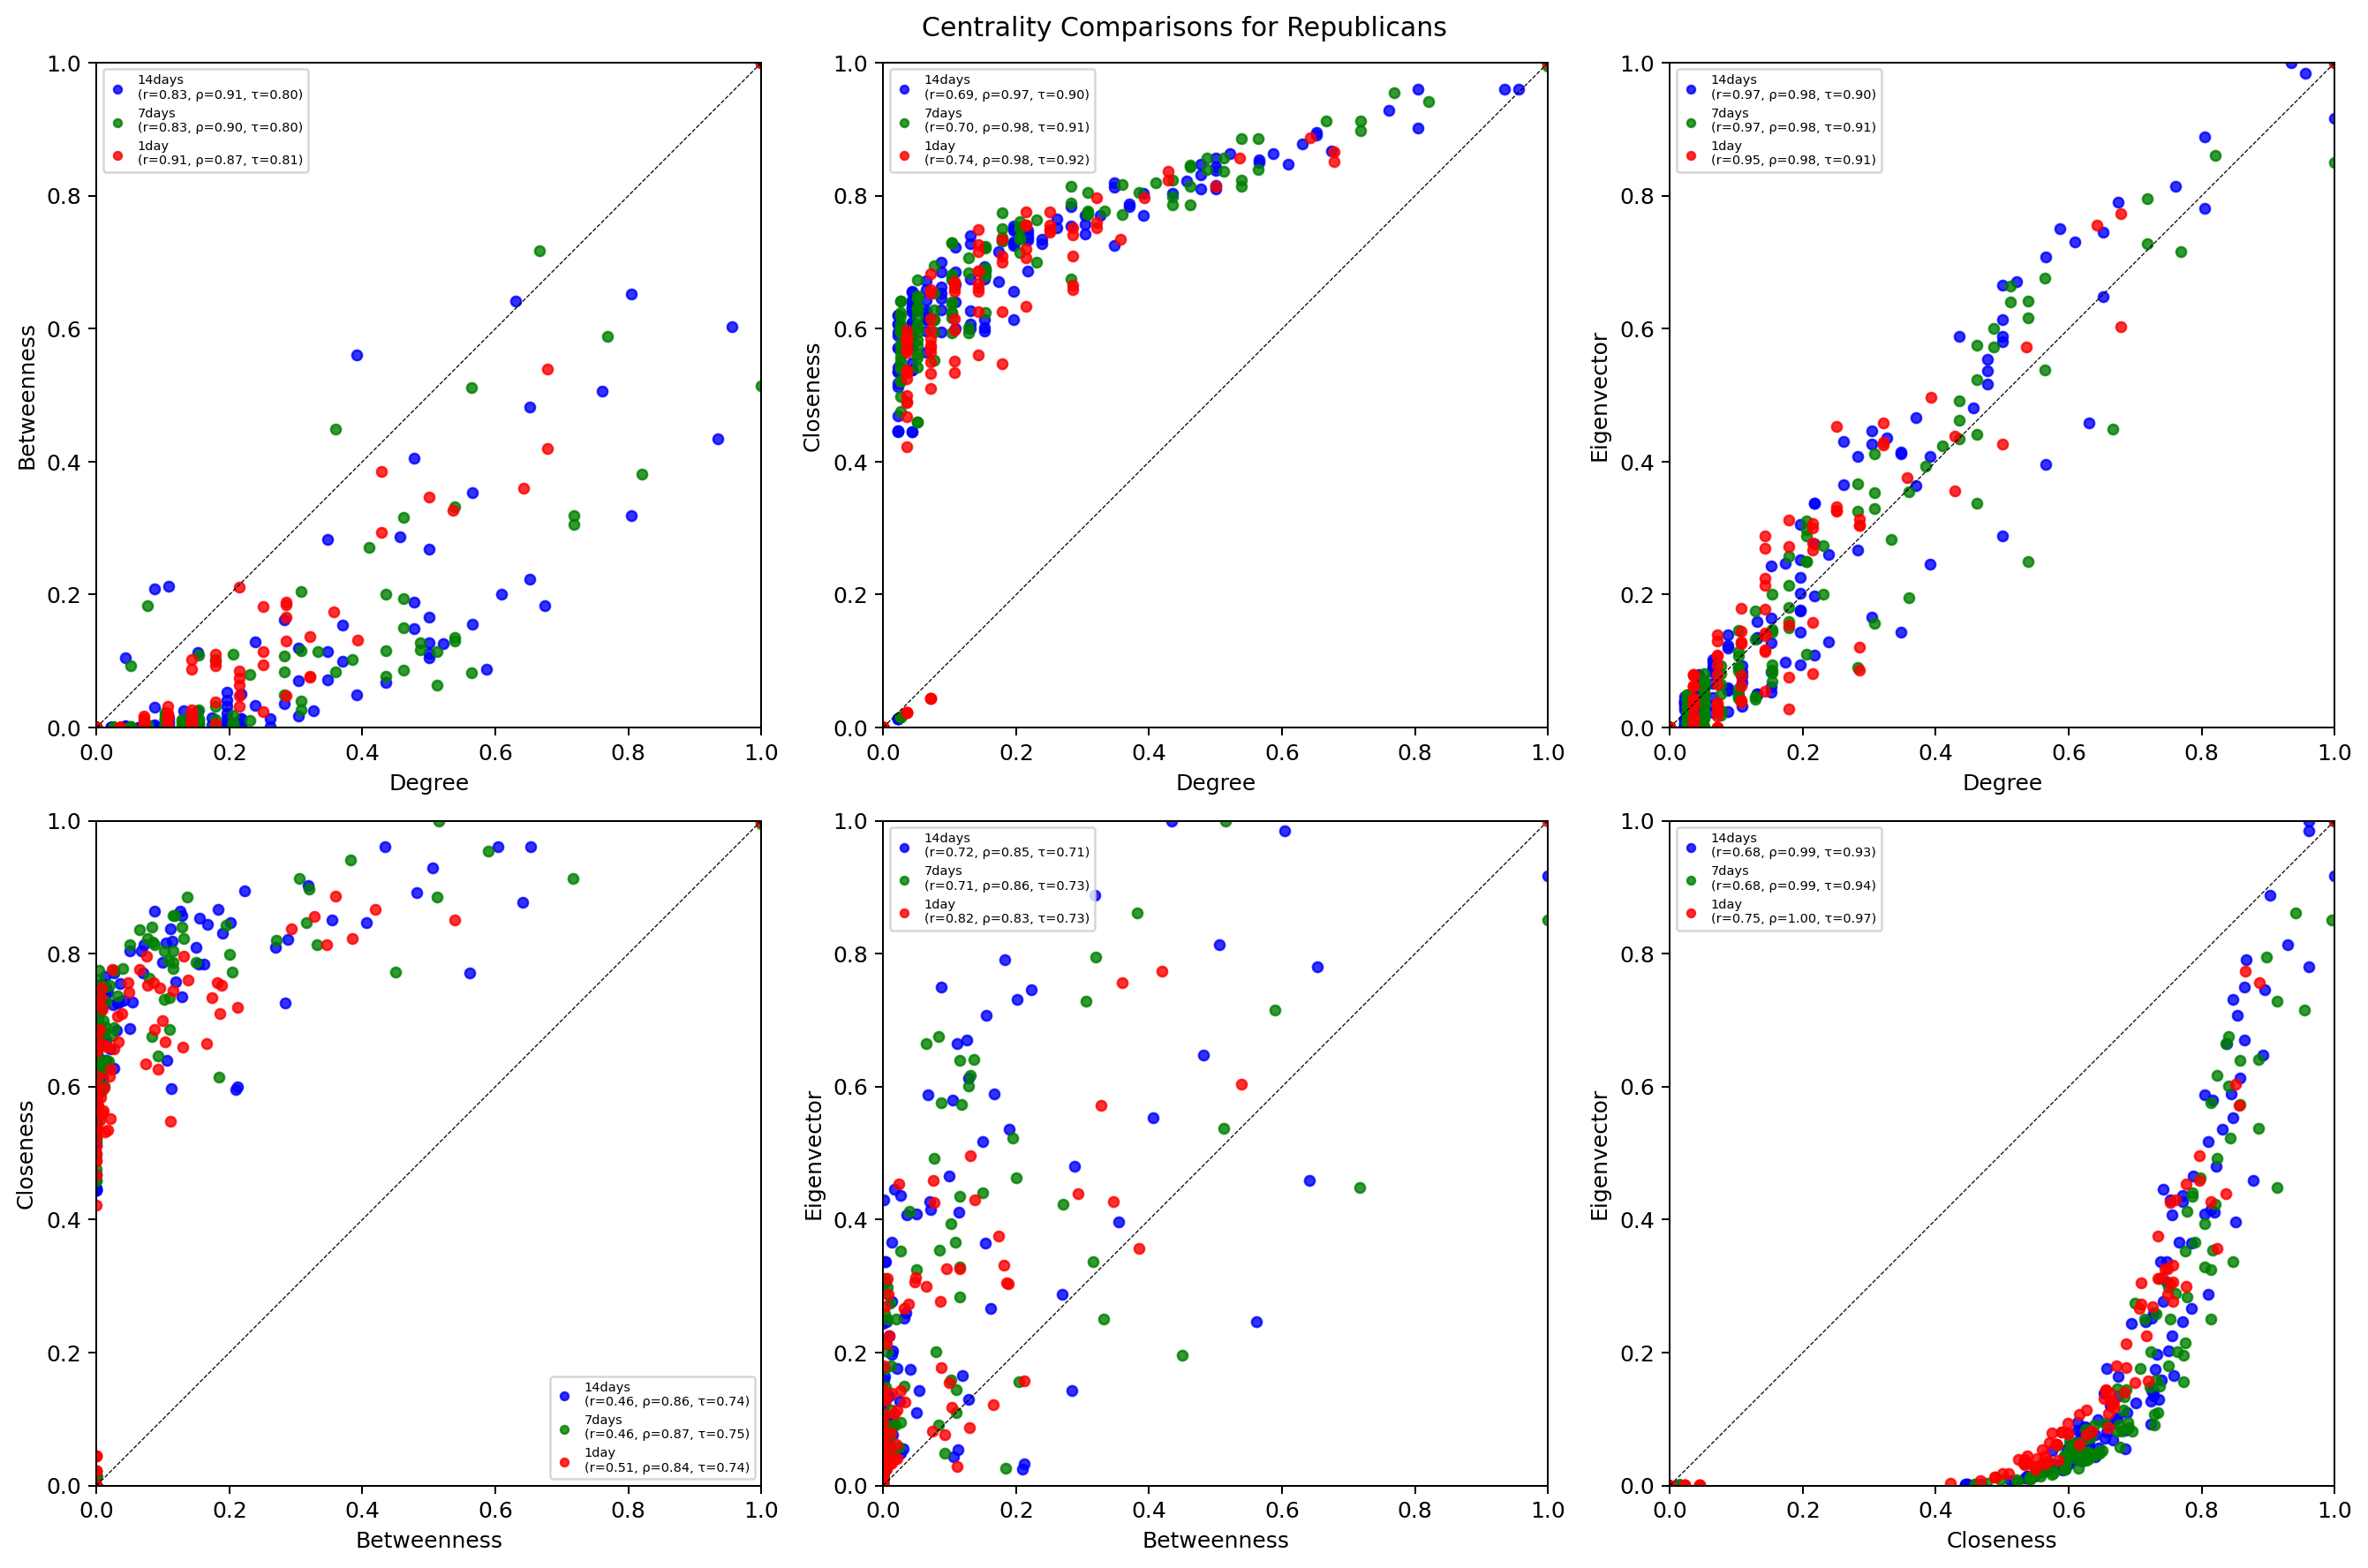

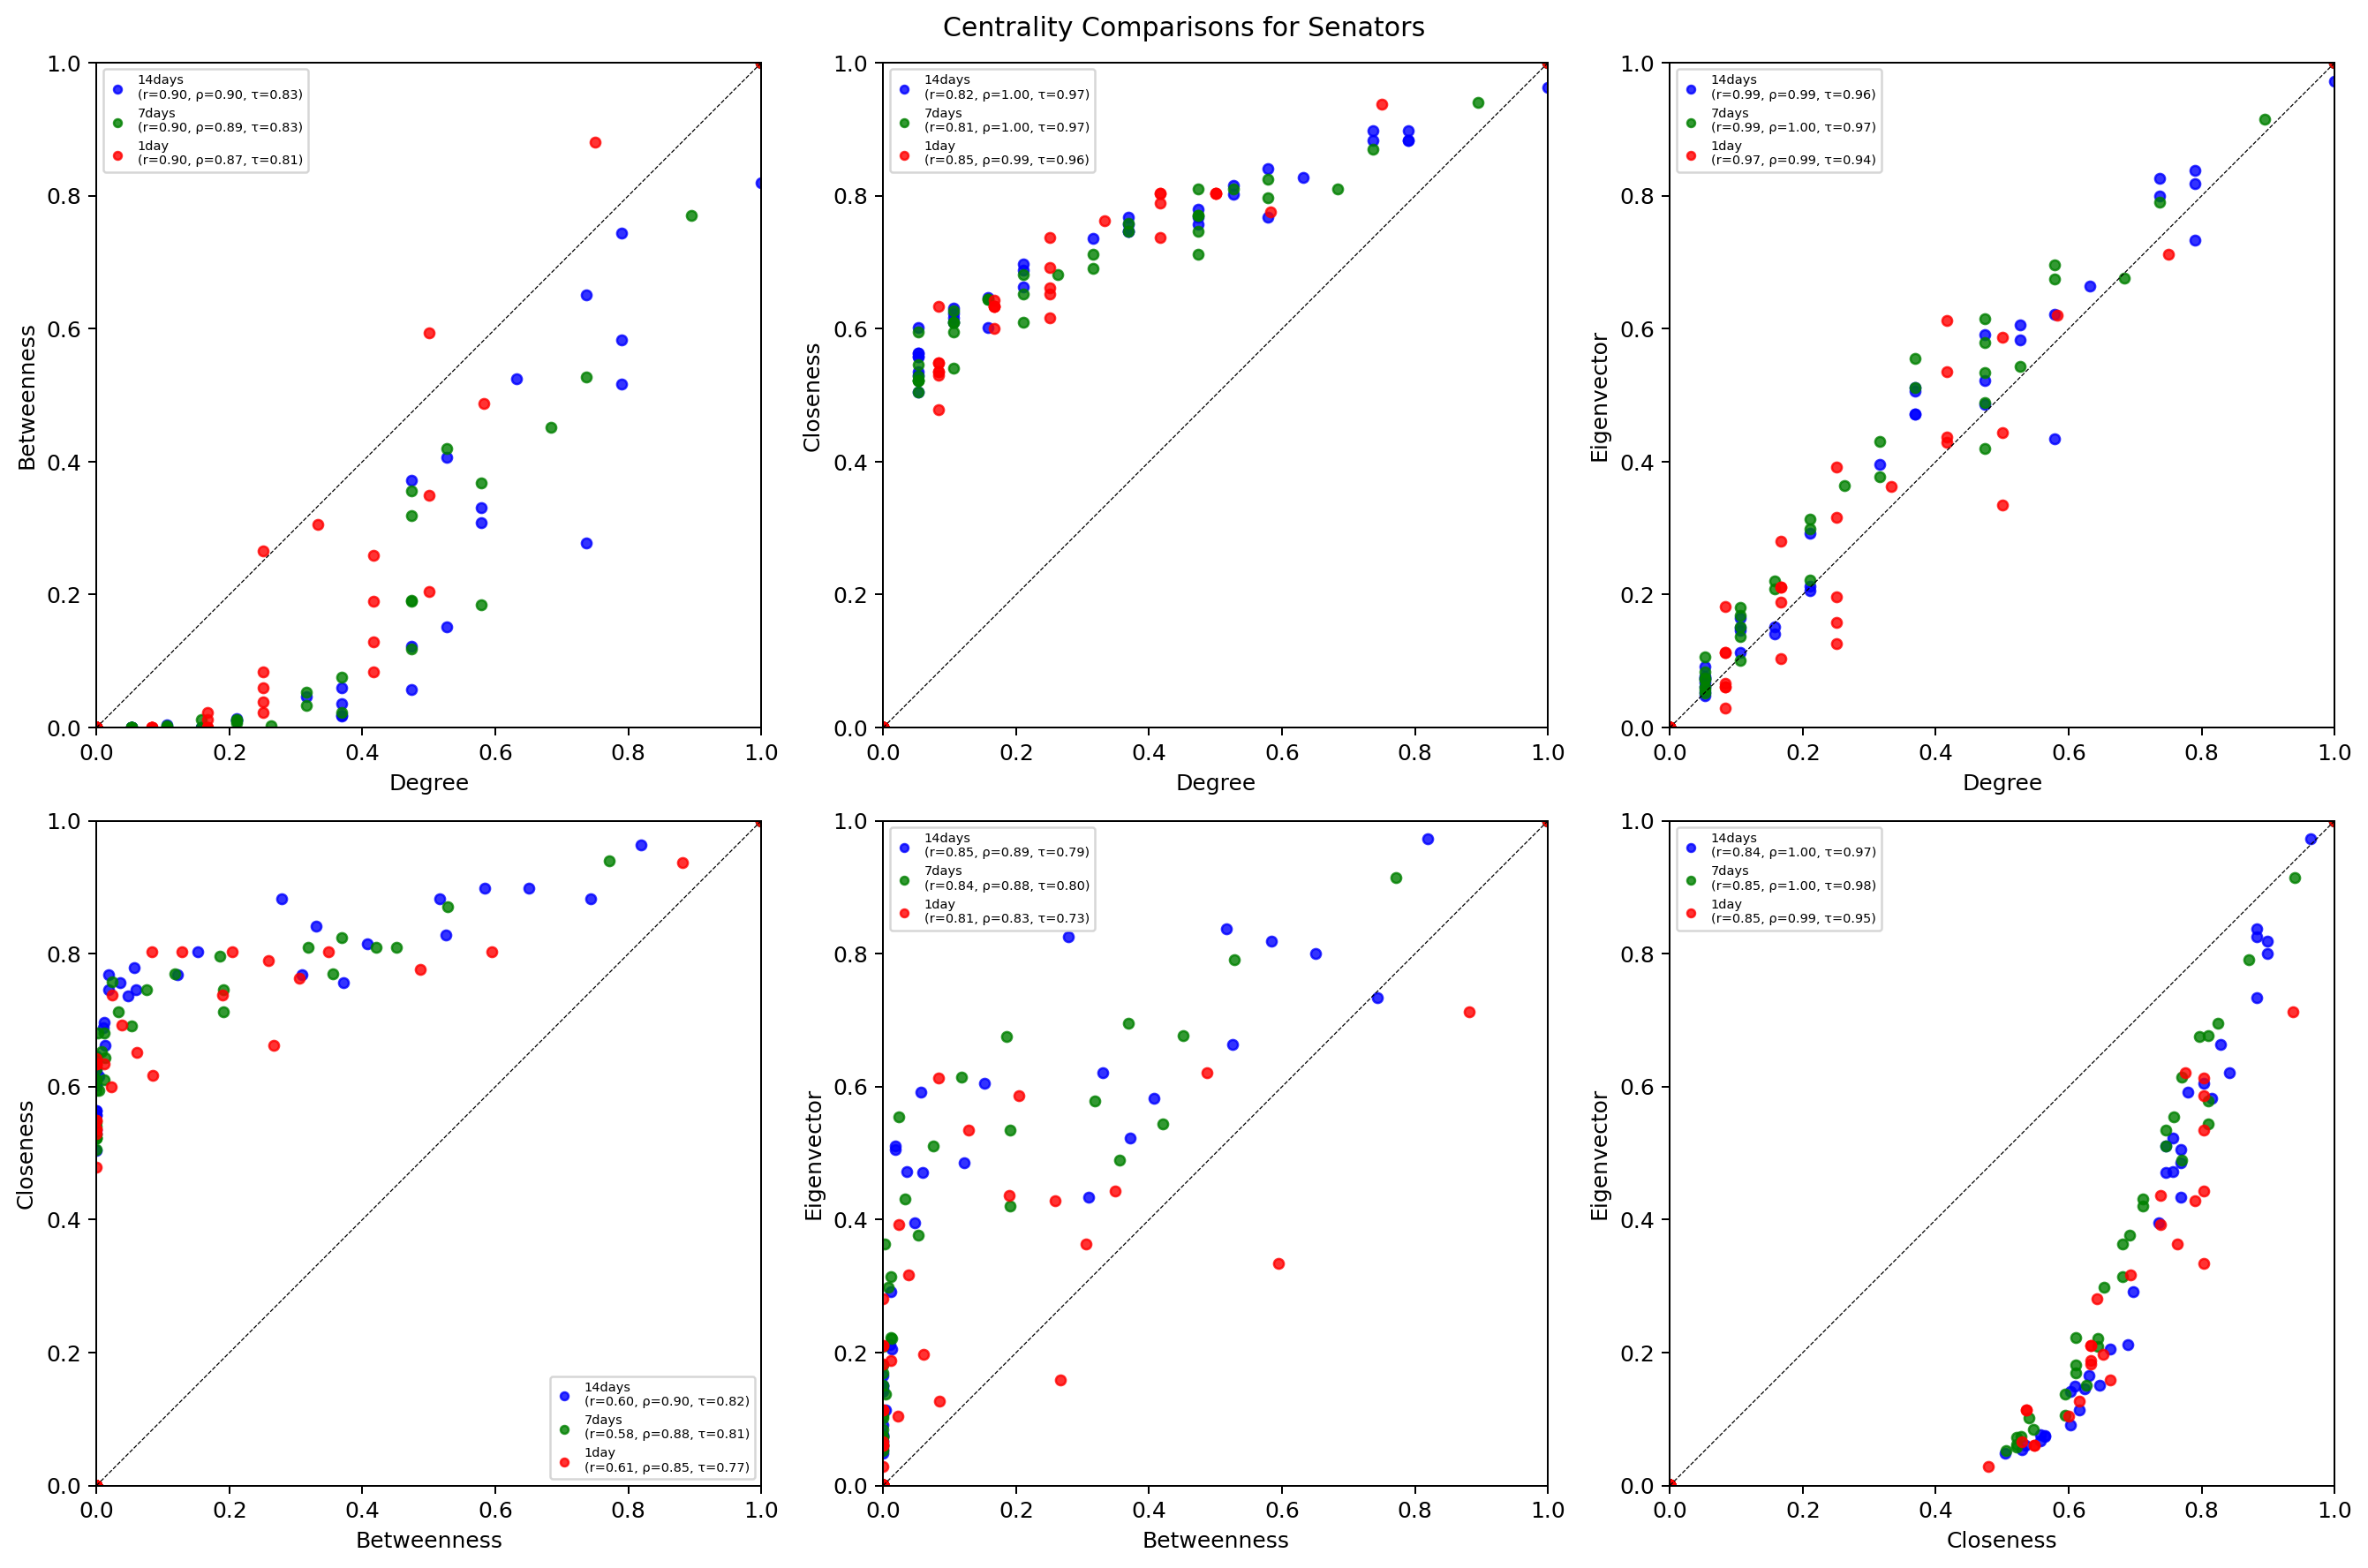

In [ ]:
categories = {
    'All_members': [
        '../data/internal/networks/all_members_14days.gml',
        '../data/internal/networks/all_members_7days.gml',
        '../data/internal/networks/all_members_1day.gml'
    ],
    'Democrats': [
        '../data/internal/networks/democrat_members_14days.gml',
        '../data/internal/networks/democrat_members_7days.gml',
        '../data/internal/networks/democrat_members_1day.gml'
    ],
    'Representatives': [
        '../data/internal/networks/representatives_14days.gml',
        '../data/internal/networks/representatives_7days.gml',
        '../data/internal/networks/representatives_1day.gml'
    ],
    'Republicans': [
        '../data/internal/networks/republican_members_14days.gml',
        '../data/internal/networks/republican_members_7days.gml',
        '../data/internal/networks/republican_members_1day.gml'
    ],
    'Senators': [
        '../data/internal/networks/senators_14days.gml',
        '../data/internal/networks/senators_7days.gml',
        '../data/internal/networks/senators_1day.gml'
    ]
}

for category, files in categories.items():
    centralities_timeframes = {}
    for timeframe, dataset_file in zip(['14days', '7days', '1day'], files):
        G = nx.read_gml(dataset_file, label='id')
        degree, betwns, closen, eigenv, degree_dic, betwns_dic, closen_dic, eigenv_dic = calculate_centralities(G)
        centralities_timeframes[timeframe] = {
            'degree': degree,
            'betweenness': betwns,
            'closeness': closen,
            'eigenvector': eigenv
        }

    fig, axs = plt.subplots(2, 3, figsize=(15, 10), dpi=180)
    fig.suptitle(f'Centrality Comparisons for {category}')

    for ax, (x_key, y_key, labex, labey) in zip(axs.flatten(), plot_pairs):
        for timeframe, color in zip(['14days', '7days', '1day'], ['blue', 'green', 'red']):
            x = centralities_timeframes[timeframe][x_key]
            y = centralities_timeframes[timeframe][y_key]
            pea = sp.stats.pearsonr(x, y)[0]
            spear = sp.stats.spearmanr(x, y)[0]
            kend = sp.stats.kendalltau(x, y)[0]

            label = f"{timeframe}\n(r={pea:.2f}, ρ={spear:.2f}, τ={kend:.2f})"
            ax.scatter(x / np.max(x), y / np.max(y), label=label, s=20, alpha=0.8, marker='o', color=color)

        ax.set_xlabel(labex)
        ax.set_ylabel(labey)
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_aspect('equal')
        ax.axline((0, 0), slope=1, color='black', linestyle='--', linewidth=0.5)
        
        ax.legend(loc='best', frameon=True, shadow=False, ncol=1, fontsize='xx-small', handlelength=1.5, markerscale=0.8)

    fig.tight_layout()
    plt.show()


**All members**\
**Degree and Eigenvector Centrality (Connectivity vs. Influence)**
The relationship between degree and eigenvector centrality is consistently the strongest across all timeframes, with a correlation coefficient ranging from r=0.98 to 
r=0.99. This shows that members with more direct connections are also the most influential in the network. The stability of this relationship highlights a centralized network structure, where influence is built on having connections to other influential members. As the timeframe increases, this relationship remains robust, indicating that connectivity and influence are tightly linked throughout.

**Degree and Betweenness Centrality (Connectivity vs. Bridging)**
Degree and betweenness centrality show a strong correlation initially (r=0.87 for 1-day) but weaken over time (r=0.76 for 14-days). This indicates that members with many direct connections often act as bridges early on but, over time, bridging roles become more specialized and less tied to high connectivity. In longer timeframes, key connectors emerge, distinct from the highly connected members, reflecting a maturing network where specialized roles develop.

**Betweenness and Eigenvector Centrality (Bridging vs. Influence)**
The relationship between betweenness and eigenvector centrality starts moderately strong (r=0.78 for 1-day) but weakens (r=0.67 for 14-days). Early on, influential members often serve as bridges connecting groups, but as the network grows, influence and bridging roles diverge. This suggests that in more mature networks, influential members focus on dominating their own groups, while distinct connectors emerge to link different parts of the network.

**Degree and Closeness Centrality (Connectivity vs. Accessibility)**
Degree and closeness centrality show a moderate and stable correlation across timeframes (r=0.62 to r=0.65). Members with higher connectivity tend to have better accessibility to the rest of the network, but this relationship is not perfect. While having more direct connections helps a member reach others more efficiently, it doesn’t guarantee optimal accessibility. This dynamic suggests that some well-connected members may still operate in localized clusters, while others span more of the network.

**Closeness and Eigenvector Centrality (Accessibility vs. Influence)**
Closeness and eigenvector centrality exhibit a strong correlation, ranging from r=0.65 to r=0.70. Influential members tend to also be highly accessible in the network, maintaining the ability to reach others efficiently. This relationship remains consistent across all timeframes, showing that influence and accessibility are closely tied, and key players often balance both roles effectively. This indicates that influential nodes are not only central in importance but also in reachability.

**Betweenness and Closeness Centrality (Bridging vs. Accessibility)**
The relationship between betweenness and closeness centrality is consistently weak, with correlation values ranging from r=0.35 to r=0.39 across all timeframes. This shows that members who act as bridges between groups don’t necessarily have the best access to the entire network. Bridging roles are often local, connecting specific groups, while accessibility reflects global reach. This dynamic highlights the division between members who serve as group connectors and those who are central to the entire network.


As the network evolves, highly connected members maintain influence, while bridging and accessibility roles become distinct, reflecting a maturing and increasingly specialized structure with interdependent centralities.

**Democrats**\
**Degree and Eigenvector Centrality (Connectivity vs. Influence)**
The correlation between degree and eigenvector centrality is consistently strong for Democratic members, ranging from r=0.97 (1-day) to r=0.98 (14-days). This indicates that members with more direct connections are also the most influential within the network. The tight correlation across all timeframes suggests that influence within the Democratic network remains highly tied to connectivity, reflecting a centralized structure where being well-connected leads directly to greater importance.

**Degree and Betweenness Centrality (Connectivity vs. Bridging)**
Degree and betweenness centrality show a strong relationship initially (r=0.88 for 1-day) but weaken slightly over time (r=0.78 for 14-days). This suggests that members with high connectivity are often crucial as bridges early on, but bridging roles become more specialized and distinct from connectivity as the timeframe extends. This reflects a shift toward role differentiation in longer periods.

**Betweenness and Eigenvector Centrality (Bridging vs. Influence)**
The correlation between betweenness and eigenvector centrality starts moderately strong (r=0.76 for 1-day) but slightly decreases over time (r=0.68 for 14-days). Early in the timeframe, influential members also serve as connectors between groups, but as the network matures, these roles separate. This indicates the development of distinct influential nodes that are less focused on bridging and more on consolidating influence within their subgroups.

**Degree and Closeness Centrality (Connectivity vs. Accessibility)**
Degree and closeness centrality show a moderate correlation (r=0.70 for 1-day, decreasing slightly to r=0.69 for 14-days). This relationship highlights that members with more direct connections tend to have better overall accessibility within the Democratic network. However, the slight weakening suggests that as the timeframe extends, some members with high connectivity may operate within local clusters rather than the entire network.

**Closeness and Eigenvector Centrality (Accessibility vs. Influence)**
The relationship between closeness and eigenvector centrality remains strong (r=0.75 to r=0.72) across all timeframes. Influential members within the Democratic network tend to also be highly accessible, maintaining reachability to others while solidifying their importance. This consistency shows that key Democratic members effectively balance influence with accessibility.

**Betweenness and Closeness Centrality (Bridging vs. Accessibility)**
Betweenness and closeness centrality have a consistently weak correlation (r=0.45 for 1-day, decreasing slightly to r=0.41 for 14-days). This indicates that members who serve as bridges between groups do not necessarily have high accessibility to the entire network. Bridging roles in the Democratic network appear to be more localized rather than global.

**Holistic Insight for Democrats**
The Democratic network demonstrates a strong alignment between connectivity (degree) and influence (eigenvector),across all timeframes. Key members remain both well-connected and influential, while bridging roles (betweenness) gradually specialize, separating from influence. Accessibility (closeness) and influence stay balanced, showing that key members are both central and reachable, reflecting a cohesive and adaptive network structure.

**Representatives**\
**Degree and Eigenvector Centrality (Connectivity vs. Influence)**
The correlation between degree and eigenvector centrality is strong and consistent for Representatives, ranging from r=0.98 across all timeframes (1-day, 7-day, and 14-day). This highlights that representatives with more direct connections tend to be the most influential in their network. The stability of this relationship indicates that connectivity plays a major role in determining influence within the Representatives' trading networks, regardless of the timeframe.

**Degree and Betweenness Centrality (Connectivity vs. Bridging)**
Degree and betweenness centrality show a strong correlation in shorter timeframes (r=0.88 for 1-day) but weaken as timeframes extend (r=0.73 for 14-days). This suggests that highly connected representatives often act as bridges early on, but bridging roles become more distinct from connectivity in longer timeframes, indicating a gradual specialization of network roles.

**Betweenness and Eigenvector Centrality (Bridging vs. Influence)**
The correlation between betweenness and eigenvector centrality is moderate, starting at r=0.79 for 1-day and declining to r=0.66 for 14-days. Early on, influential representatives often serve as connectors between groups, but as the network matures, bridging and influence roles diverge. This suggests that bridging representatives become less influential within their groups over time.

**Degree and Closeness Centrality (Connectivity vs. Accessibility)**
The correlation between degree and closeness centrality is moderate (r=0.65 for 1-day) and weakens slightly over time (r=0.63 for 14-days). This indicates that representatives with higher connectivity generally have better access to the network, but this relationship is not perfect. Over time, some highly connected representatives may focus on local clusters, reducing their overall accessibility.

**Closeness and Eigenvector Centrality (Accessibility vs. Influence)**
Closeness and eigenvector centrality have a strong and consistent correlation (r=0.70 for 1-day, remaining at r=0.66 for 14-days). This shows that influential representatives also maintain high accessibility, emphasizing their role as both key influencers and central hubs in the network. The slight decline suggests some representatives may trade accessibility for more localized influence over time.

**Betweenness and Closeness Centrality (Bridging vs. Accessibility)**
The relationship between betweenness and closeness centrality is weak (r=0.39 for 1-day, decreasing slightly to r=0.33 for 14-days). This reflects that representatives who act as bridges between groups do not necessarily have high accessibility to the entire network. Bridging roles appear more localized, emphasizing connectivity between specific groups rather than the overall network.


The Representatives' network demonstrates a strong connection between influence (eigenvector) and connectivity (degree), with these roles remaining consistent over time. Bridging roles (betweenness) gradually separate from both connectivity and influence, showing specialization as the network matures. Accessibility (closeness) and influence remain tightly linked, with key representatives balancing these roles, while bridging remains more localized within subgroups.

**Republicans**\
**Degree and Eigenvector Centrality (Connectivity vs. Influence)**
For Republicans, the correlation between degree and eigenvector centrality is consistently very strong across all timeframes, with r=0.95 for 1-day and r=0.97 for 14-days. This indicates that well-connected Republican members tend to also hold significant influence in the network. This strong and stable relationship suggests that influence remains highly dependent on connectivity within the Republican trading network.

**Degree and Betweenness Centrality (Connectivity vs. Bridging)**
Degree and betweenness centrality exhibit a high correlation in shorter timeframes (r=0.91 for 1-day), which weakens slightly over time (r=0.83 for 14-days). This reflects a common trend where well-connected members initially act as key bridges, but over longer periods, bridging roles become more distinct from connectivity, emphasizing role specialization within the network.

**Betweenness and Eigenvector Centrality (Bridging vs. Influence)**
The correlation between betweenness and eigenvector centrality is moderate to high, with r=0.82 for 1-day, declining slightly to r=0.72 for 14-days. Early in the timeframe, influential Republican members often serve as bridges between groups, but this connection weakens over time as bridging and influence roles become more distinct, aligning with increased network maturity.

**Degree and Closeness Centrality (Connectivity vs. Accessibility)**
Degree and closeness centrality show a moderate correlation across timeframes (r=0.74 for 1-day and r=0.69 for 14-days). This indicates that highly connected Republicans generally have good accessibility within the network, although the relationship weakens slightly as the timeframe extends, reflecting possible focus on local clusters.

**Closeness and Eigenvector Centrality (Accessibility vs. Influence)**
The relationship between closeness and eigenvector centrality is consistently strong, with r=0.75 for 1-day and r=0.68 for 14-days. Influential Republican members tend to also be highly accessible, reinforcing their roles as key hubs within the network. The slight weakening suggests that some members focus more on consolidating localized influence over time.

**Betweenness and Closeness Centrality (Bridging vs. Accessibility)**
The correlation between betweenness and closeness centrality is weak to moderate, starting at r=0.51 for 1-day and decreasing to r=0.46 for 14-days. This highlights that Republican members acting as bridges are not necessarily the most accessible within the network, indicating a division between global and local roles within the network.


The Republican network demonstrates a strong link between influence (eigenvector) and connectivity (degree), reflecting a centralized structure where well-connected members dominate. Bridging roles (betweenness) gradually separate from connectivity and influence, indicating increasing role differentiation over time. Accessibility (closeness) remains tightly linked with influence, while bridging roles appear more localized, emphasizing a clear division of labor within the network.

**Senators**\
**Degree vs Betweenness Centrality**
The correlation between degree and betweenness centrality is quite high across all timeframes, with Pearson’s correlation coefficient (r) consistently around 0.90. This indicates that Senators with a high number of connections also tend to be more central in terms of mediating connections between others.

**Degree vs Closeness Centrality**
The relationship between degree and closeness centrality is strong, as there is high correlation values (r ranging between 0.82 and 0.85). Senators with more direct connections tend to have shorter average distances to other nodes in the network, reflecting their centrality within the group.

**Degree vs Eigenvector Centrality**
The correlation between degree and eigenvector centrality is almost perfect (r around 0.99 across all timeframes). This suggests that Senators with more connections also tend to connect to other well-connected nodes, reinforcing their influence in the network.

**Betweenness vs Closeness Centrality**
Betweenness and closeness centrality exhibit moderate correlations (r values range from 0.58 to 0.61), indicating that Senators who mediate many paths are also likely to have shorter distances to others in the network, though this relationship is not as strong as with degree centrality.

**Betweenness vs Eigenvector Centrality**
The correlation between betweenness and eigenvector centrality is moderate (r around 0.85), indicating that mediating key connections often aligns with connecting to influential nodes, though not as strongly as the degree centrality relationships.

**Closeness vs Eigenvector Centrality**
The correlation between closeness and eigenvector centrality is exceptionally strong (r around 0.85), reinforcing the idea that Senators with shorter paths to others often connect to influential nodes.



The centrality measures for Senators consistently highlight strong interrelationships, with degree centrality emerging as a dominant factor influencing other measures such as eigenvector and closeness centrality. This suggests that in the Senate network, connections to influential members and overall reachability are closely intertwined, reflecting a cohesive structure where influence and accessibility are highly correlated.

## Original vs randomized centralities

/tmp/ipykernel_1208/2371746463.py:86: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  pea = sp.stats.pearsonr(random_values, original_values)[0]


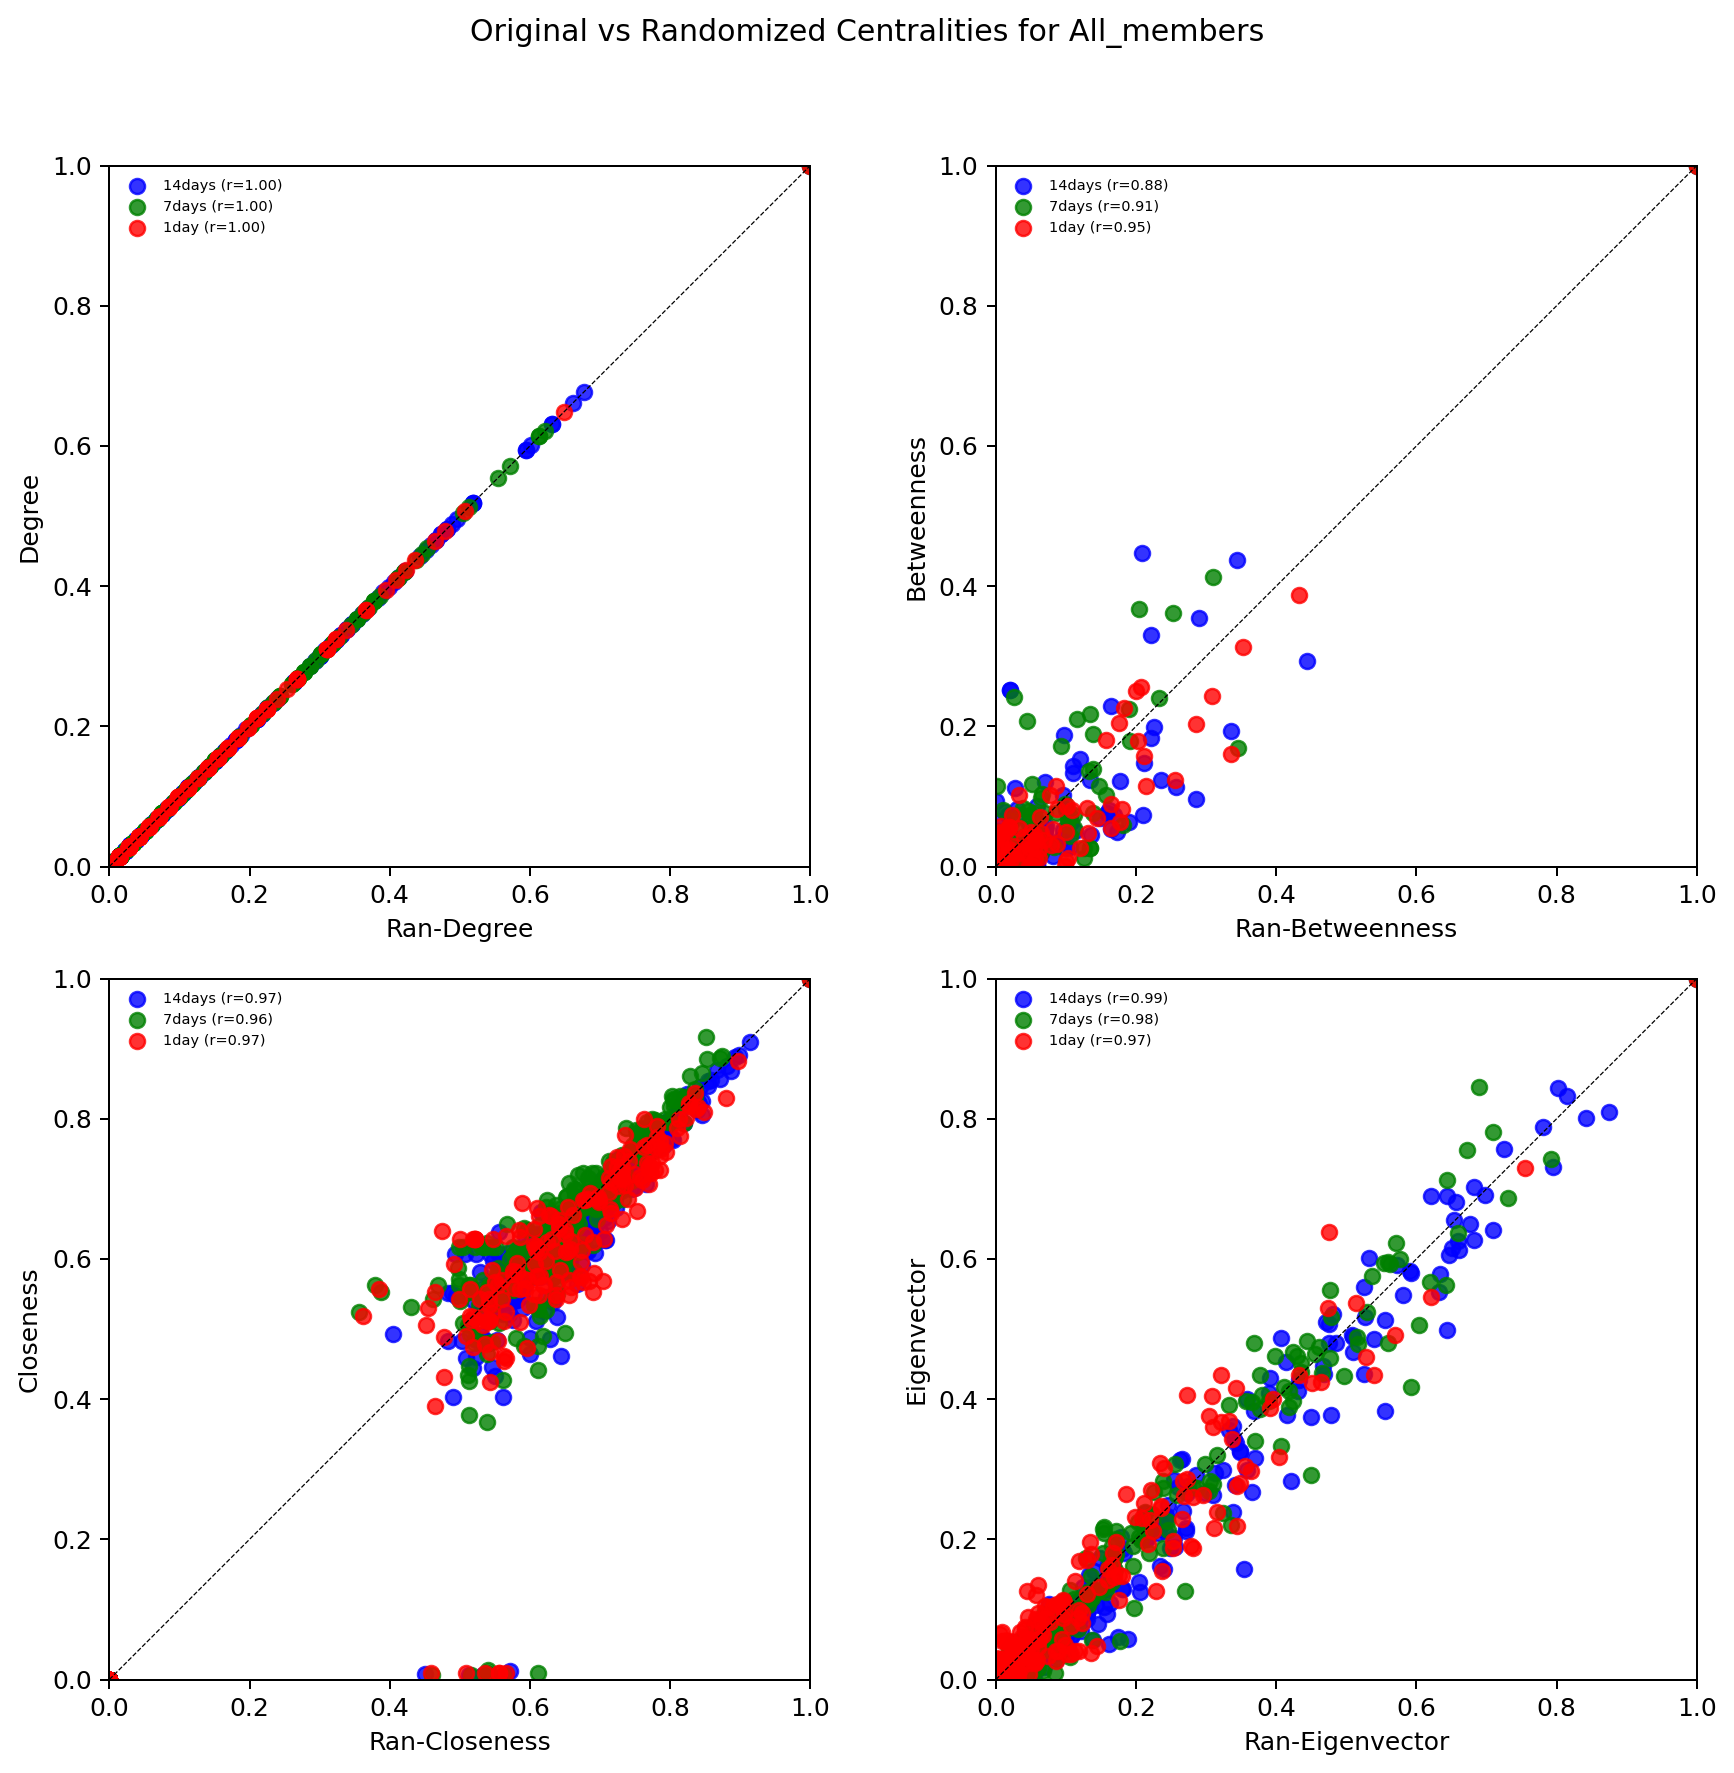

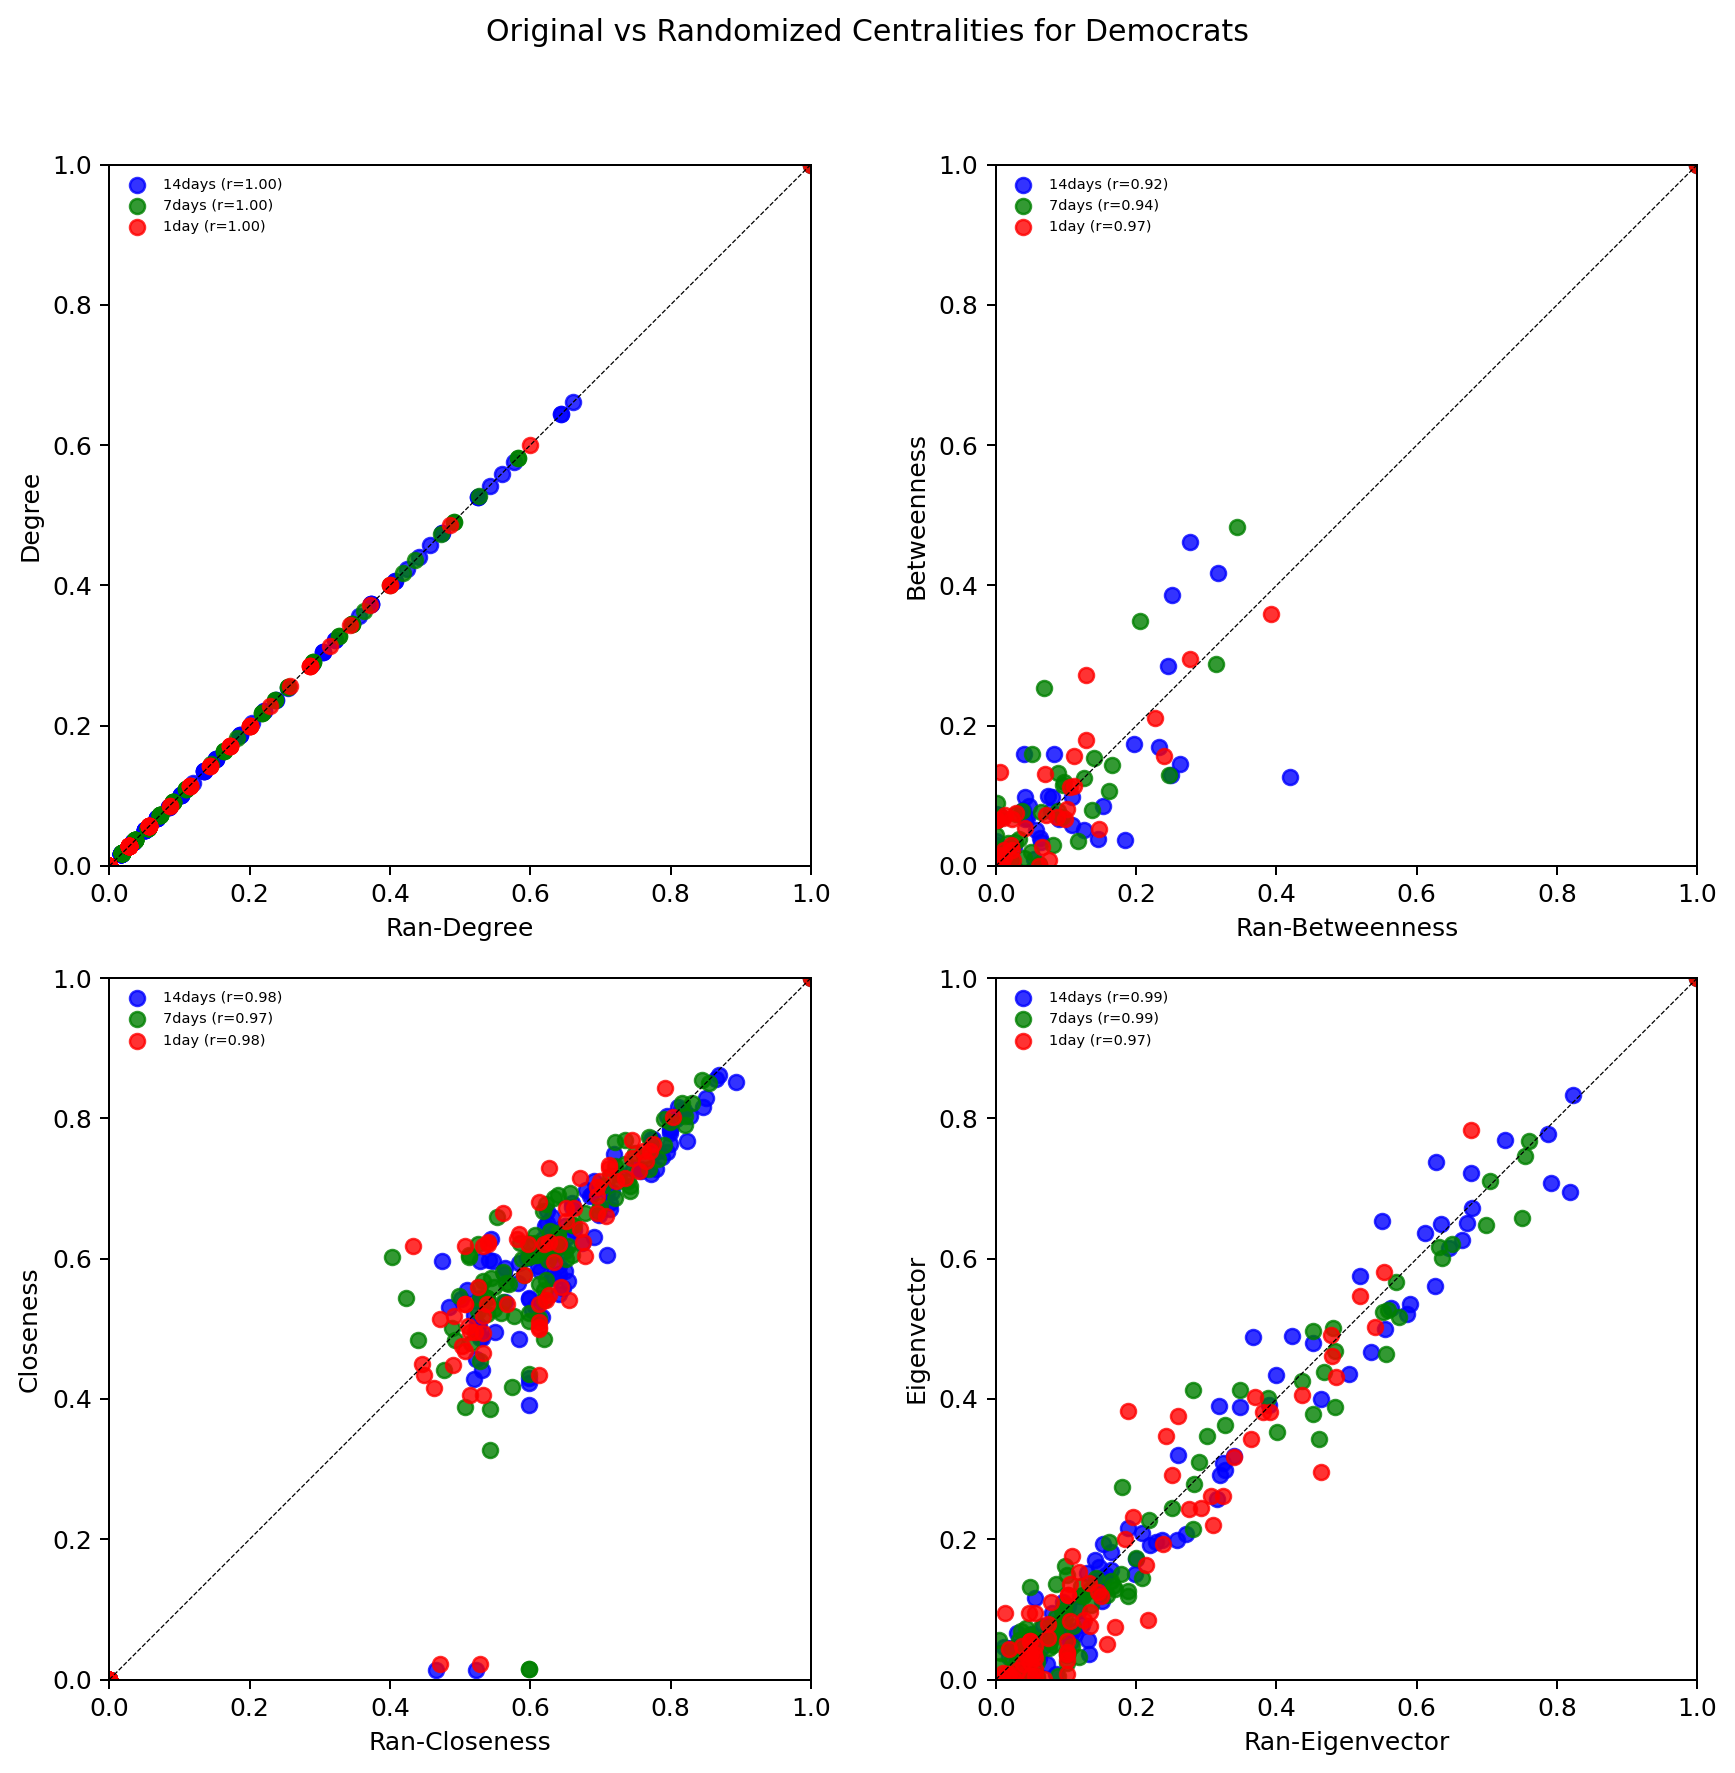

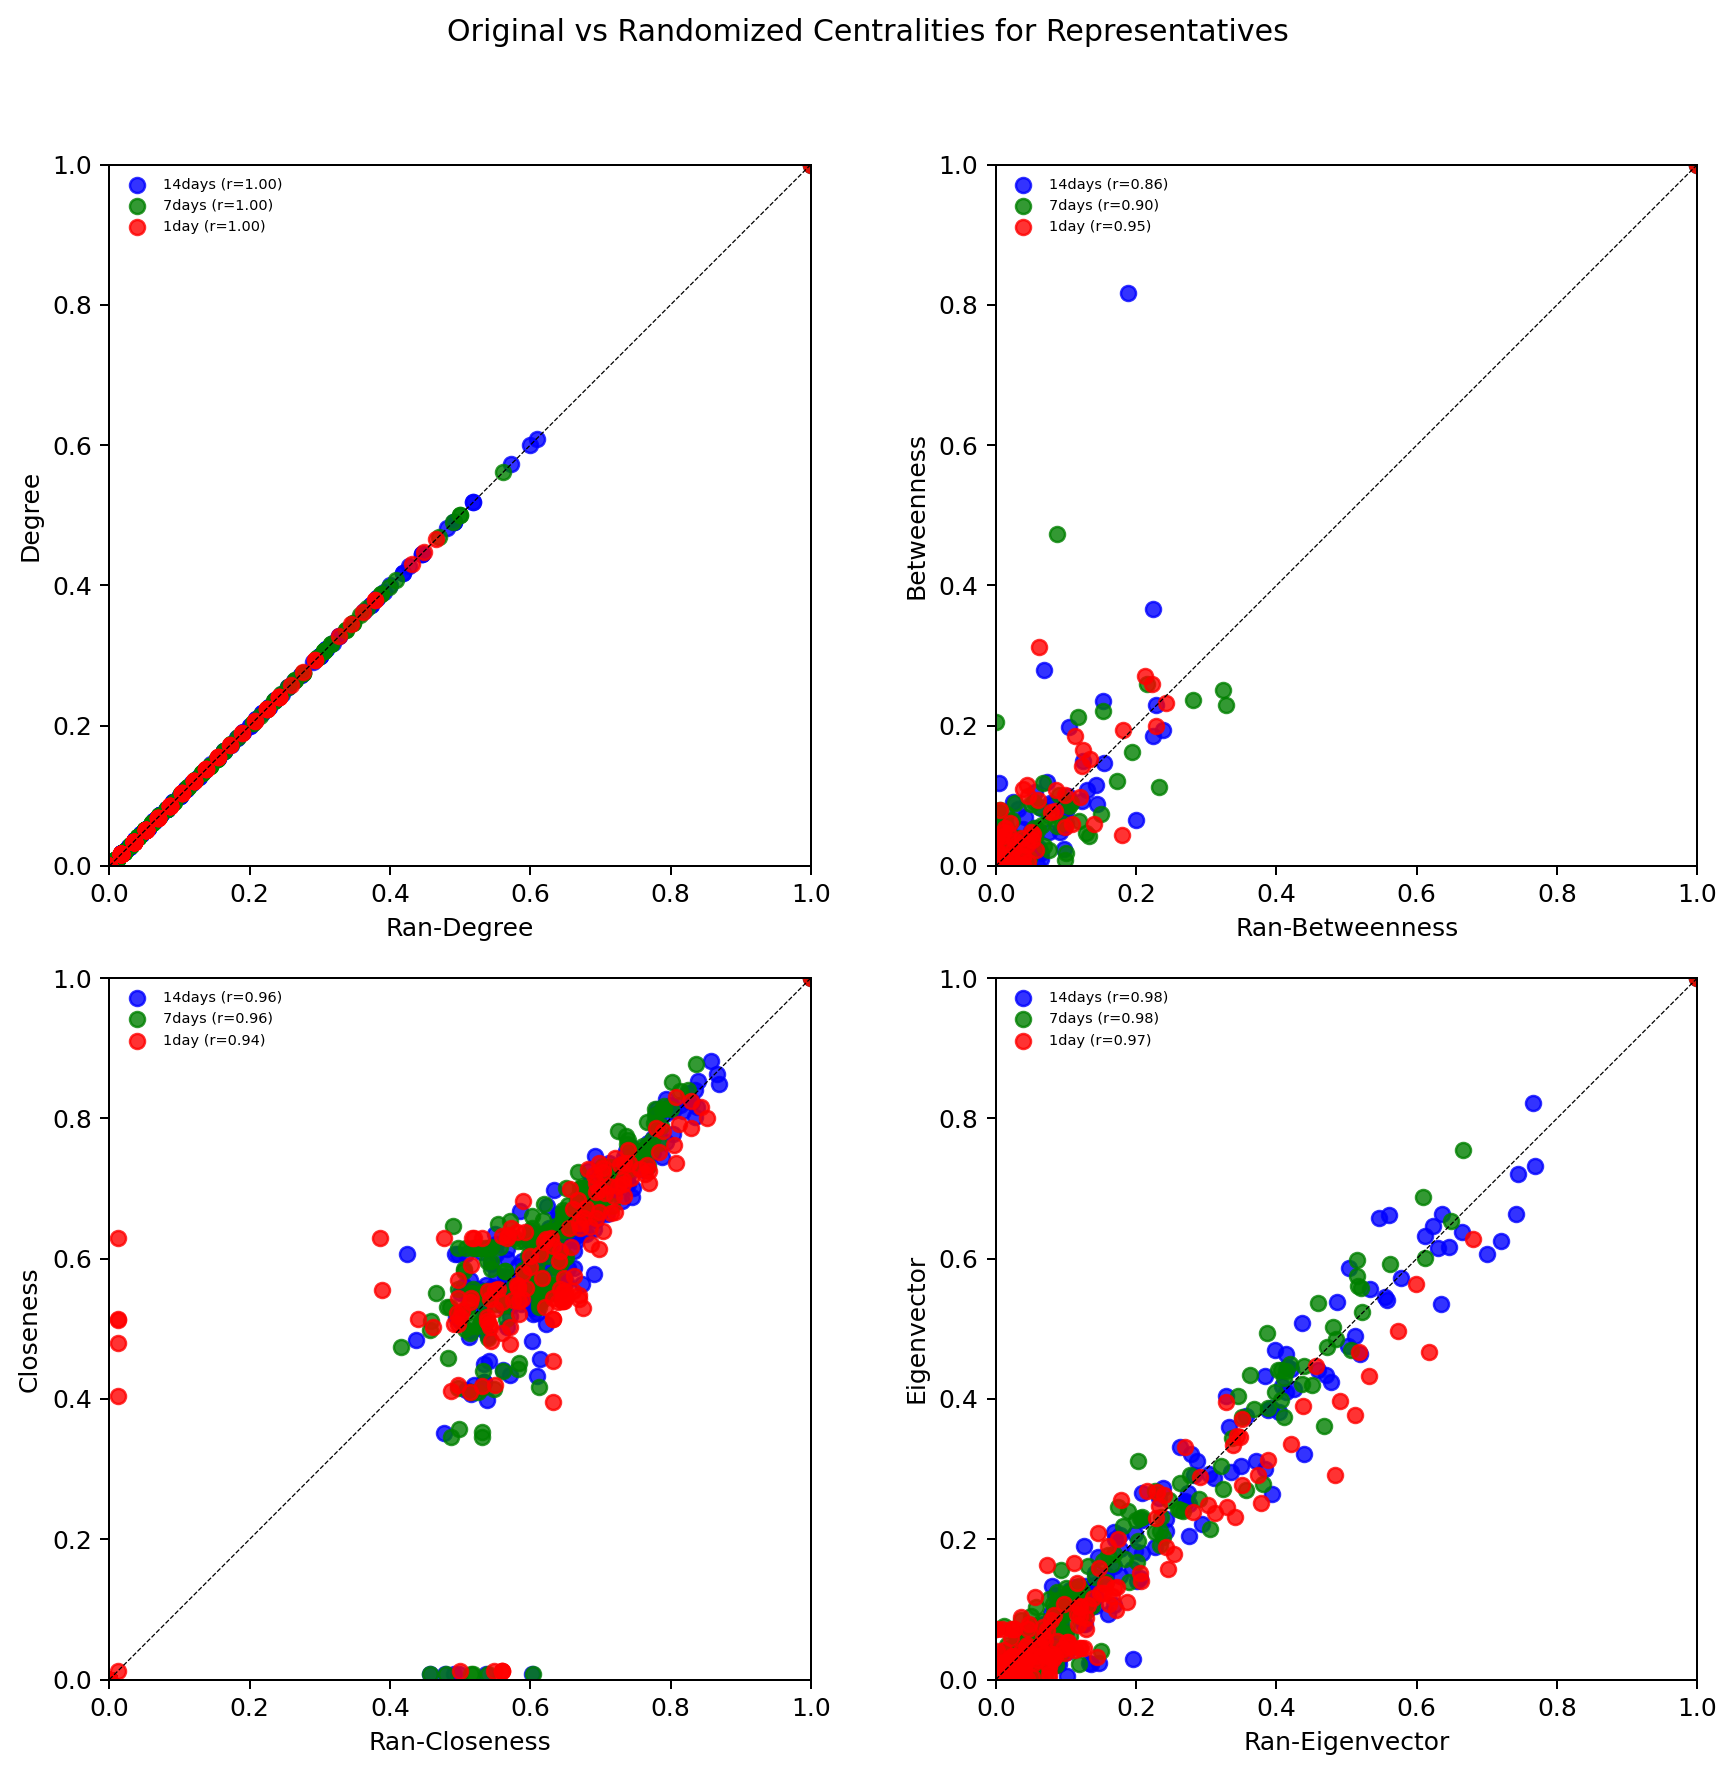

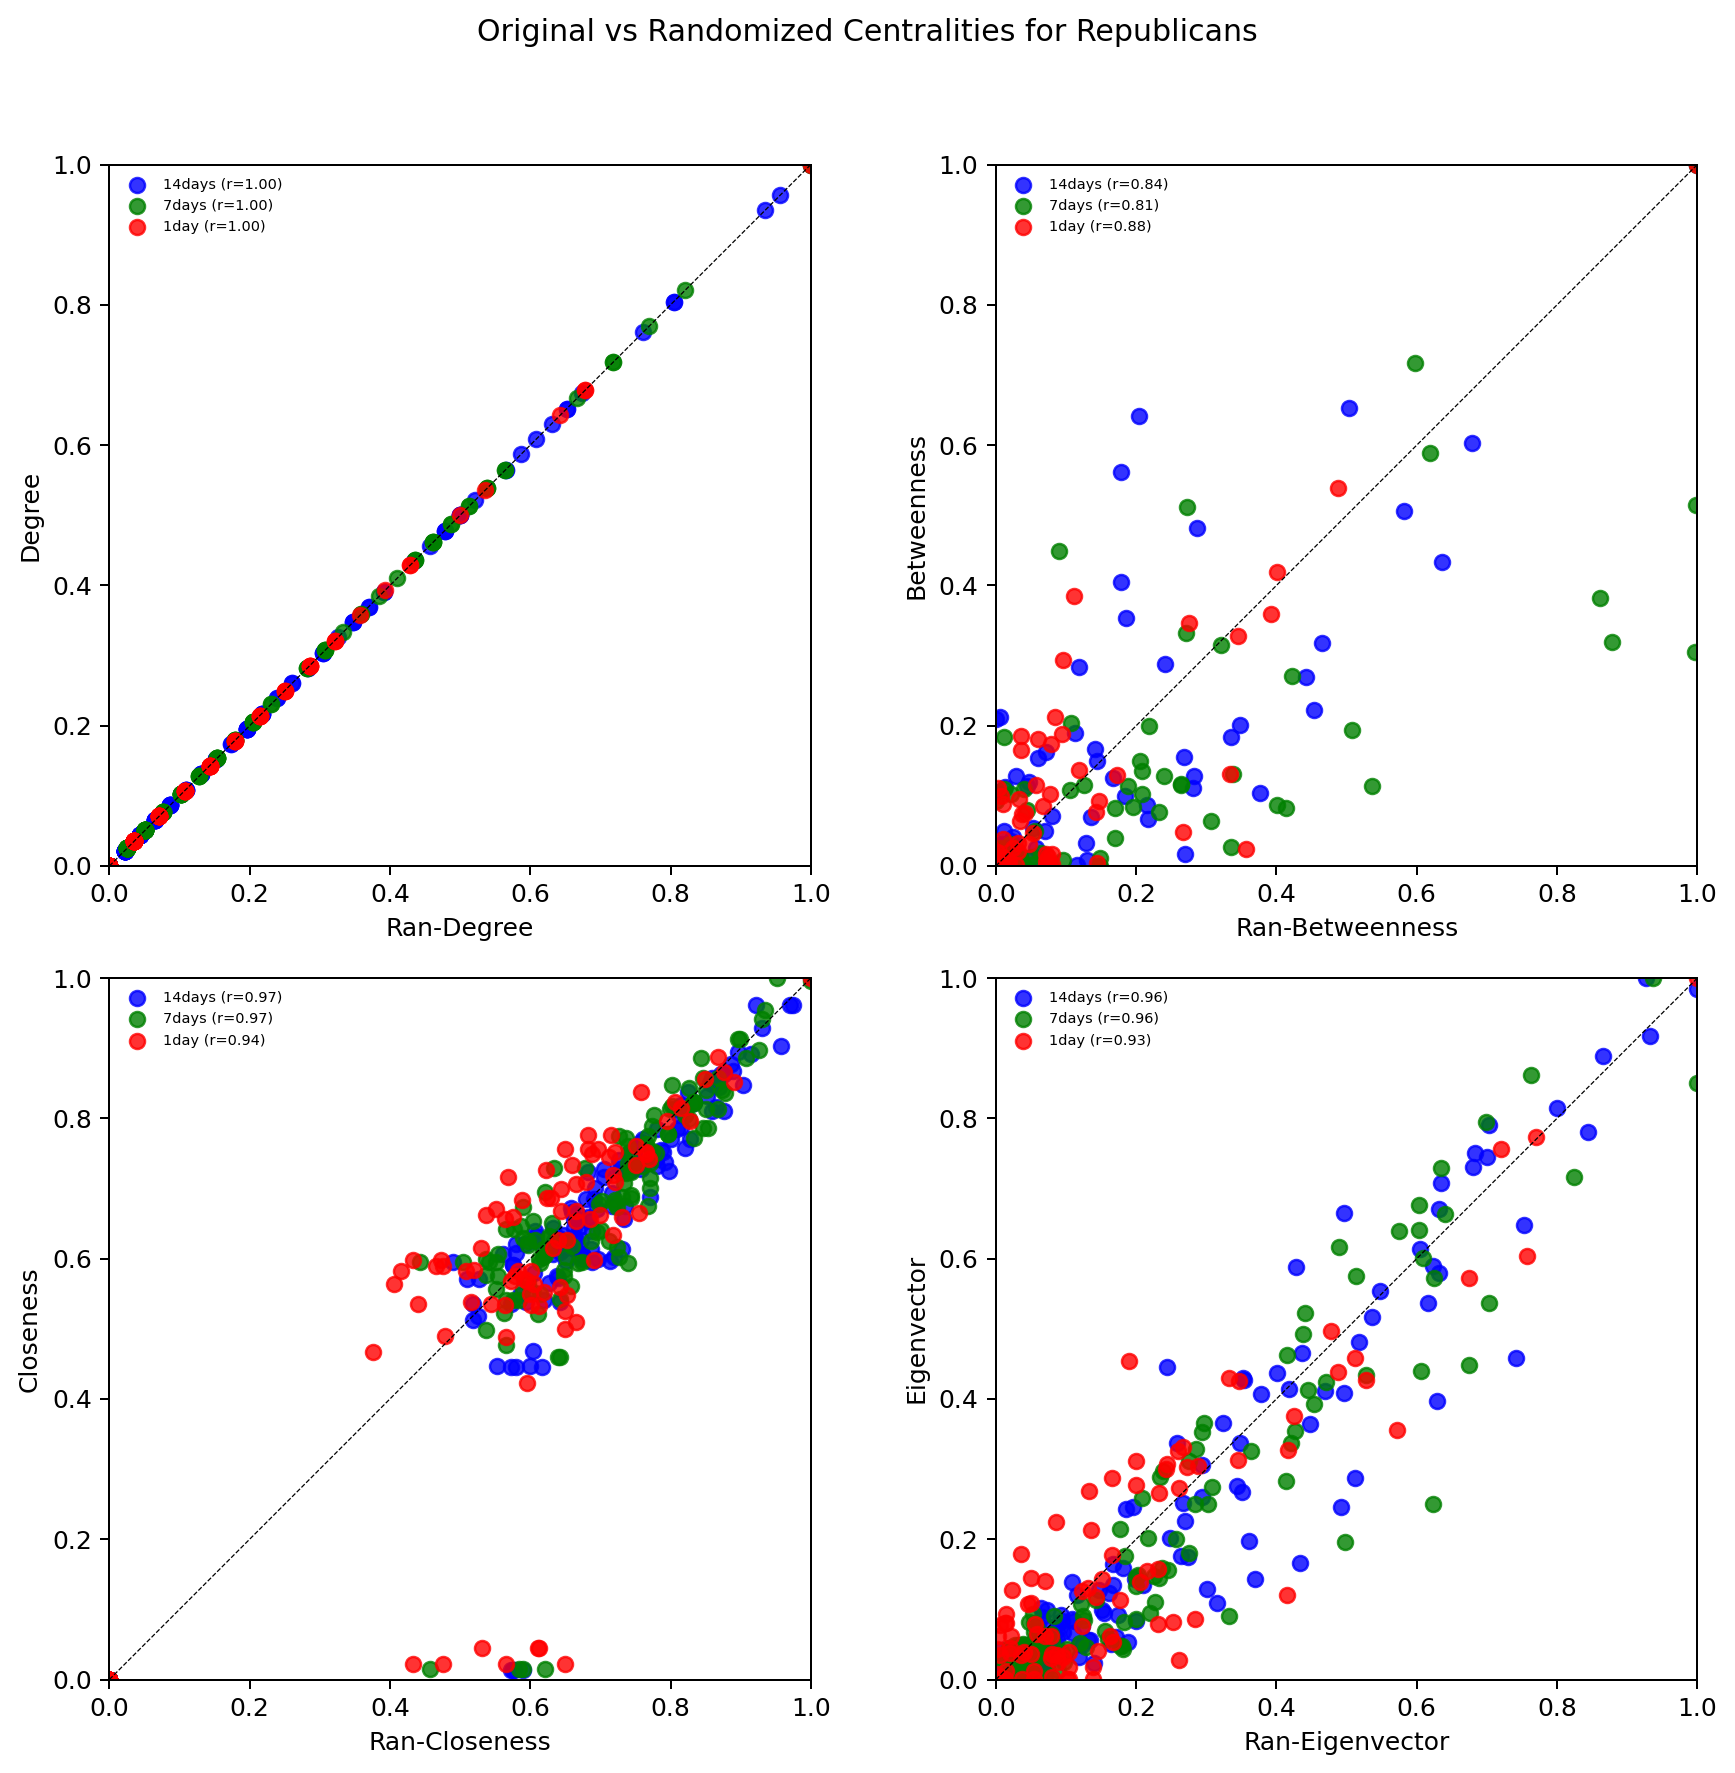

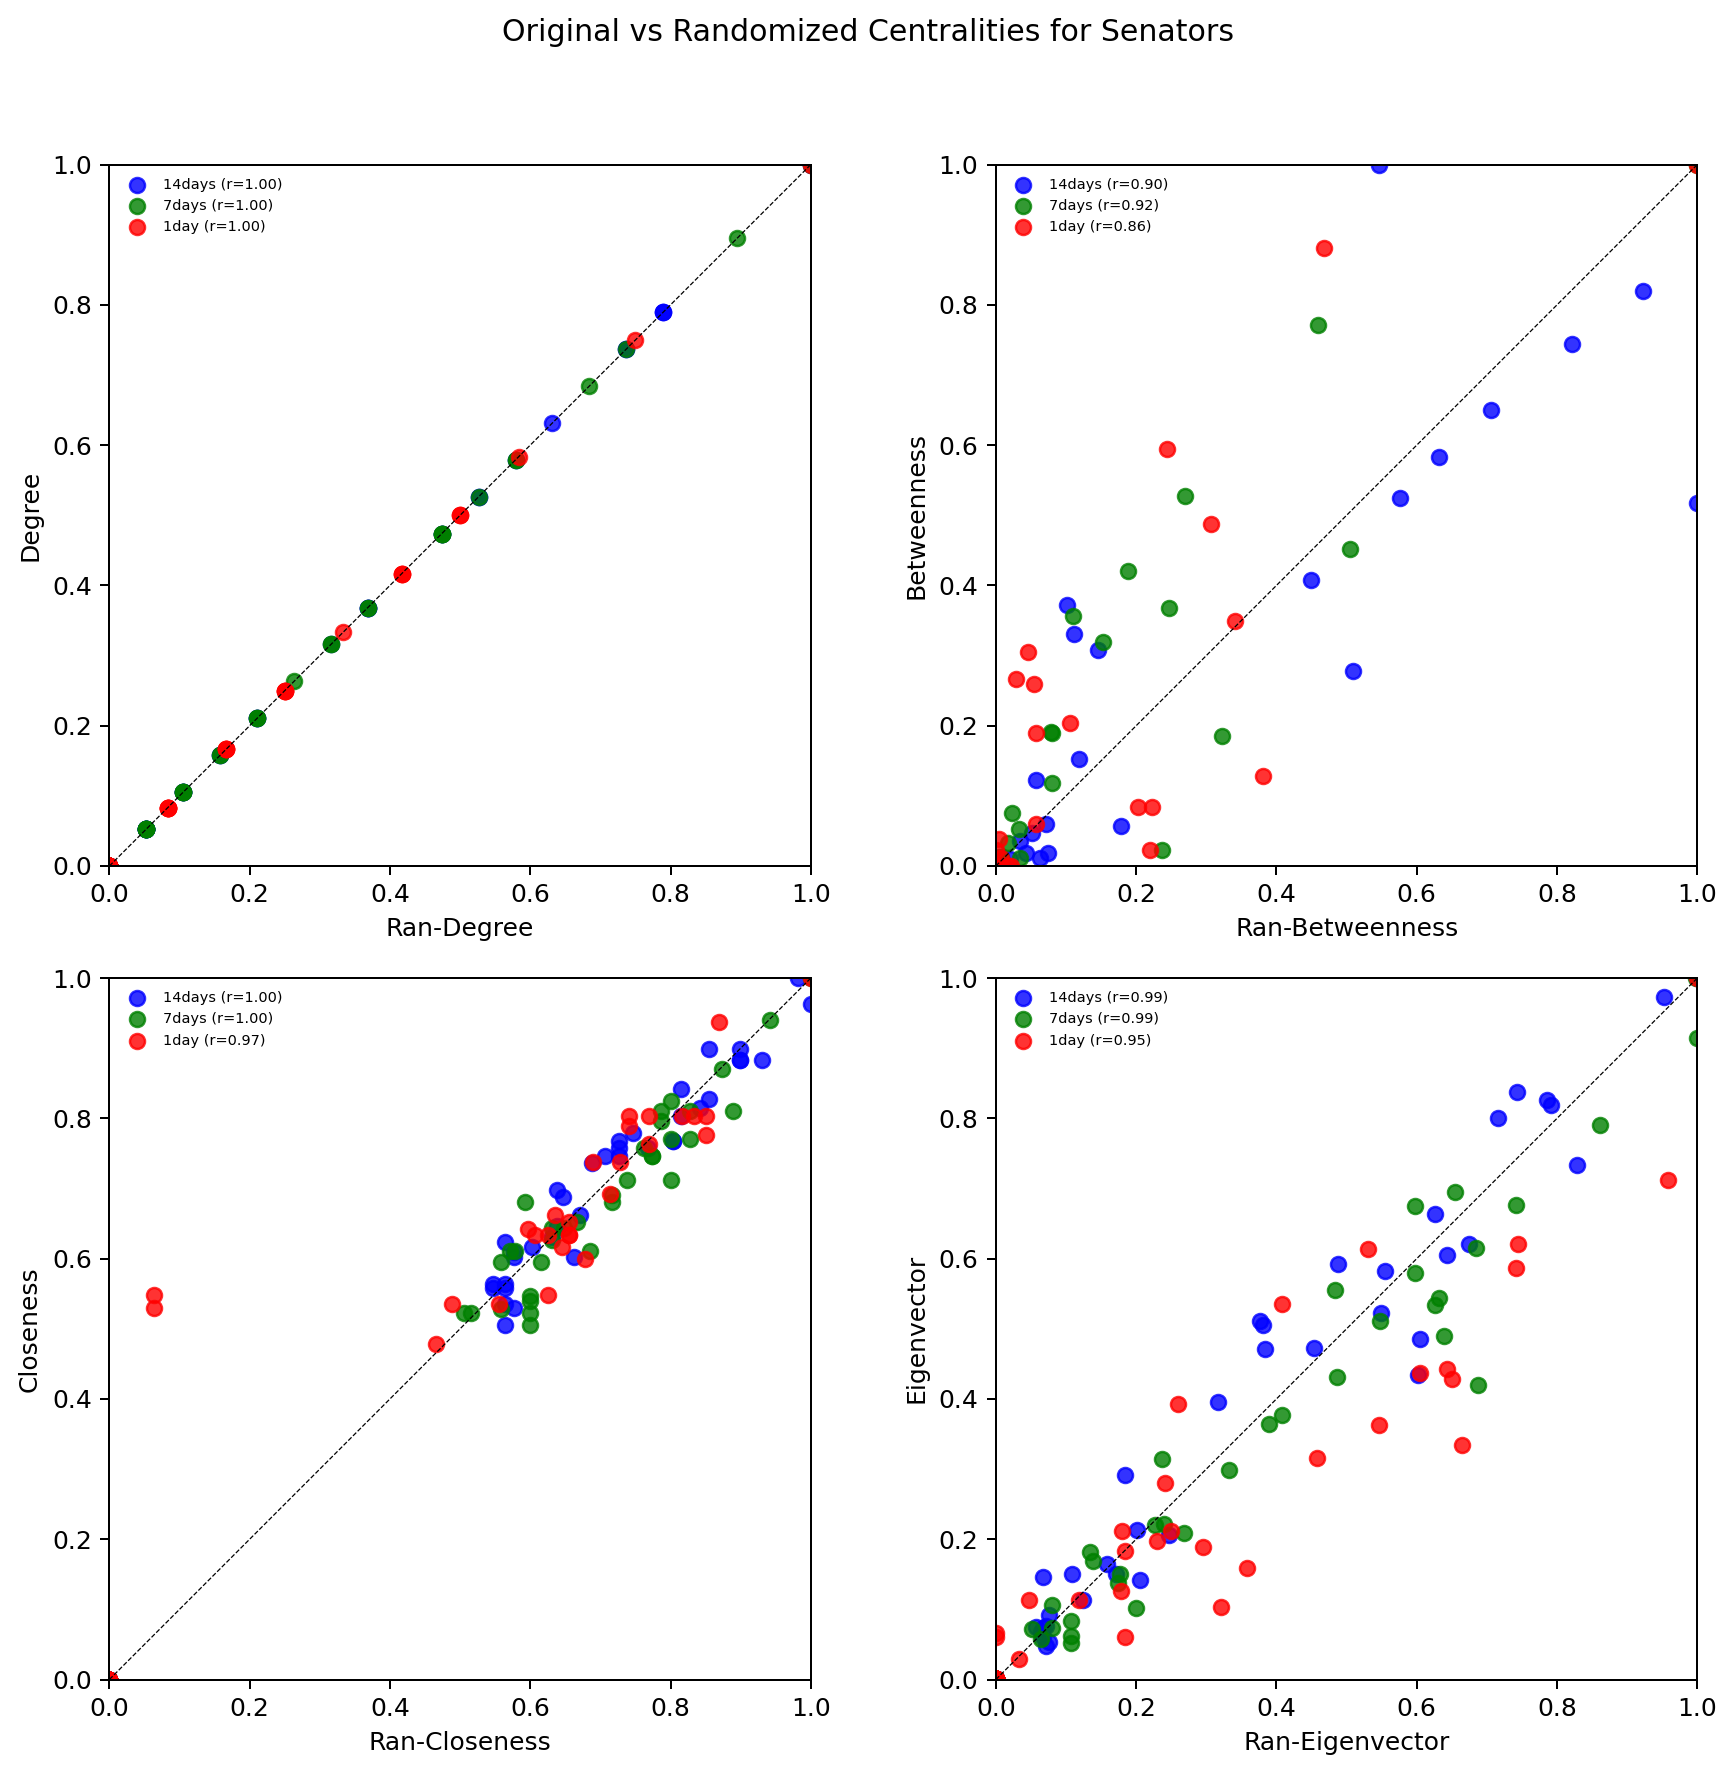

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import networkx as nx

categories = {
    'All_members': [
        '../data/internal/networks/all_members_14days.gml',
        '../data/internal/networks/all_members_7days.gml',
        '../data/internal/networks/all_members_1day.gml'
    ],
    'Democrats': [
        '../data/internal/networks/democrat_members_14days.gml',
        '../data/internal/networks/democrat_members_7days.gml',
        '../data/internal/networks/democrat_members_1day.gml'
    ],
    'Representatives': [
        '../data/internal/networks/representatives_14days.gml',
        '../data/internal/networks/representatives_7days.gml',
        '../data/internal/networks/representatives_1day.gml'
    ],
    'Republicans': [
        '../data/internal/networks/republican_members_14days.gml',
        '../data/internal/networks/republican_members_7days.gml',
        '../data/internal/networks/republican_members_1day.gml'
    ],
    'Senators': [
        '../data/internal/networks/senators_14days.gml',
        '../data/internal/networks/senators_7days.gml',
        '../data/internal/networks/senators_1day.gml'
    ]
}

randomized_pairs = [
    ('degree', 'degree', 'Ran-Degree', 'Degree'),
    ('betweenness', 'betweenness', 'Ran-Betweenness', 'Betweenness'),
    ('closeness', 'closeness', 'Ran-Closeness', 'Closeness'),
    ('eigenvector', 'eigenvector', 'Ran-Eigenvector', 'Eigenvector')
]


timeframes = ['14days', '7days', '1day']
colors = ['blue', 'green', 'red']

for category, files in categories.items():
    centralities_timeframes = {}
    for timeframe, dataset_file, color in zip(timeframes, files, colors):
        G = nx.read_gml(dataset_file, label='id')

        Gr = nx.random_reference(G, niter=100, connectivity=False, seed=1234)

        (
            degree, betwns, closen, eigenv, 
            degree_dic, betwns_dic, closen_dic, eigenv_dic
        ) = calculate_centralities(G)
        
        (
            ran_degree, ran_betwns, ran_closen, ran_eigenv,
            ran_degree_dic, ran_betwns_dic, ran_closen_dic, ran_eigenv_dic
        ) = calculate_centralities(Gr)
        

        centralities_timeframes[timeframe] = {
            'original': {
                'degree': degree,
                'betweenness': betwns,
                'closeness': closen,
                'eigenvector': eigenv
            },
            'randomized': {
                'degree': ran_degree,
                'betweenness': ran_betwns,
                'closeness': ran_closen,
                'eigenvector': ran_eigenv
            }
        }
    
    fig, axs = plt.subplots(2, 2, figsize=(10, 10), dpi=180)
    fig.suptitle(f'Original vs Randomized Centralities for {category}')

    for ax, (original_key, random_key, labex, labey) in zip(axs.flatten(), randomized_pairs):
        for timeframe, color in zip(timeframes, colors):
            original_values = centralities_timeframes[timeframe]['original'][original_key]
            random_values = centralities_timeframes[timeframe]['randomized'][random_key]
            
            pea = sp.stats.pearsonr(random_values, original_values)[0]
            
            normalized_original = np.array(original_values) / np.max(original_values) if np.max(original_values) > 0 else original_values
            normalized_random = np.array(random_values) / np.max(random_values) if np.max(random_values) > 0 else random_values
            
            
            ax.scatter(normalized_random, normalized_original, 
                       label=f"{timeframe} (r={pea:.2f})", alpha=0.8, marker='o', color=color)
        
        ax.set_xlabel(labex)
        ax.set_ylabel(labey)
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.axline((0, 0), slope=1, color='black', linestyle='--', linewidth=0.5)  
        ax.set_aspect('equal')
        ax.legend(loc='best', fontsize='xx-small', frameon=False)

    
    fig.tight_layout(rect=[0, 0, 1, 0.95])  
    plt.show()

**All members**

**Degree Centrality:**
In all timeframes (1-day, 7-day, and 14-day), degree centrality for original and randomized networks shows a perfect correlation of r=1.00, indicating identical degree distribution between the two. This suggests that the number of connections is structurally preserved in the randomization process.

**Betweenness Centrality:**
Betweenness centrality exhibits moderate to high correlations:
1-day: r=0.95
7-day: r=0.91
14-day: r=0.88
This means that the way certain members act as bridges or connectors in the network changes when it's randomized. These changes suggest that the original network has intentional patterns of trading behavior that get disrupted in the random version.

**Closeness Centrality:**
Closeness centrality retains very high correlations:

1-day: r=0.97
7-day: r=0.96
14-day: r=0.97
This suggests that the global reachability of nodes is only slightly affected by randomization, emphasizing that most nodes remain similarly accessible in both original and randomized networks.

**Eigenvector Centrality:**
Eigenvector centrality maintains extremely high correlations:

1-day: r=0.97
7-day: r=0.98
14-day: r=0.99
The high values suggest that the influence of nodes, based on their connections to other influential nodes, is only minimally impacted by randomization.


**Insight:**
 Degree and eigenvector centralities, show minimal differences between original and randomized networks, highlighting structural preservation of connectivity and influence. However, the discrepancies in betweenness centrality reveal how intentional trading behaviors and strategic pathways are disrupted in the randomized networks. This underscores the role of deliberate interactions in shaping the dynamics of the original network.

**Representatives**

**Degree Centrality:**
In all timeframes (1-day, 7-day, and 14-day), degree centrality for original and randomized networks shows a perfect correlation of r=1.00, indicating identical degree distributions between the two. This suggests that the number of connections is structurally preserved in the randomization process.

**Betweenness Centrality:**
Betweenness centrality exhibits moderate to high correlations:

1-day: r=0.95
7-day: r=0.90
14-day: r=0.86
The moderate differences indicate that the pathway-based roles of nodes (how they connect disparate parts of the network) are altered in randomized networks, reflecting the disruption of intentional behaviors in the original network.

**Closeness Centrality:**
Closeness centrality retains very high correlations:

1-day: r=0.94
7-day: r=0.96
14-day: r=0.96
This suggests that the global reachability of nodes is only slightly affected by randomization, emphasizing that most nodes remain similarly accessible in both original and randomized networks.

**Eigenvector Centrality:**
Eigenvector centrality maintains extremely high correlations:

1-day: r=0.97
7-day: r=0.98
14-day: r=0.98
The high values suggest that the influence of nodes, based on their connections to other influential nodes, is only minimally impacted by randomization.


**Insight:**
For representatives, degree and eigenvector centralities, are nearly identical between original and randomized networks, reflecting strong structural preservation of connectivity and influence. Betweenness centrality shows moderate changes, highlighting the disruption of strategic pathways and intentional bridging behaviors. The overall network retains its fundamental characteristics, with key influence measures showing high stability.

**Democrats**

**Degree Centrality:**
Across all timeframes (1-day, 7-day, and 14-day), degree centrality for original and randomized networks maintains a perfect correlation of r=1.00. This result demonstrates that the connectivity structure, in terms of direct connections, remains fully preserved in the randomization process.

**Betweenness Centrality:**
Betweenness centrality correlations for Democrats between original and randomized networks are as follows:

1-day: r=0.97
7-day: r=0.94
14-day: r=0.92
These correlations indicate that while pathway-based roles of nodes are altered in the randomized network, they still retain significant similarity to the original structure.

**Closeness Centrality:**
Closeness centrality shows very high correlations:

1-day: r=0.98
7-day: r=0.97
14-day: r=0.98
This suggests that the global accessibility of nodes within the network is only marginally impacted by the randomization.

**Eigenvector Centrality:**
Eigenvector centrality demonstrates extremely high correlations:

1-day: r=0.97
7-day: r=0.99
14-day: r=0.99
These results suggest that the influence of nodes, as determined by their connections to influential neighbors, remains almost unchanged.


**Insight:**
 For Democrats, degree and eigenvector centralities, remain nearly identical between the original and randomized networks, reflecting strong structural preservation of connectivity and influence. Betweenness centrality, while slightly affected, still retains high similarity, indicating that the primary strategic pathways remain partially intact. Overall, the network demonstrates resilience to randomization, with influence measures showing remarkable stability.

**Republicans**

**Degree Centrality:**
In all timeframes (1-day, 7-day, and 14-day), degree centrality for original and randomized networks shows a perfect correlation of r=1.00, indicating that the degree distribution remains identical between the two. This suggests that the number of connections is fully preserved during randomization.

**Betweenness Centrality:**
Betweenness centrality exhibits moderate correlations, indicating significant variation between original and randomized networks:

1-day: r=0.88
7-day: r=0.81
14-day: r=0.84
These differences highlight that strategic pathways within the network, essential for connecting disparate parts, are substantially disrupted in randomized networks.

**Closeness Centrality:**
Closeness centrality maintains high correlations across all timeframes, reflecting the preservation of node reachability, though minor variations exist:

1-day: r=0.94
7-day: r=0.97
14-day: r=0.97
This consistency suggests that global accessibility of nodes is only slightly altered by randomization.

**Eigenvector Centrality:**
Eigenvector centrality exhibits strong correlations but shows a noticeable reduction compared to degree centrality:

1-day: r=0.93
7-day: r=0.96
14-day: r=0.96
This implies that while the overall influence of nodes is mostly preserved, some influential connections are altered during randomization.


**Insight:**
For Republican members, randomization preserves key structural properties like degree centralities, reflecting consistent connectivity and influence rankings. However, the disruption of betweenness centrality highlights the loss of strategic pathways, emphasizing the intentional interactions present in the original network. Closeness and eigenvector centralities remain robust, indicating stable global accessibility and influence across randomizations.

**Senataros**

**Degree Centrality:**
Across all timeframes (1-day, 7-day, and 14-day), degree centrality shows a perfect correlation of r=1.00 between the original and randomized networks. This highlights that the number of connections per node is fully preserved during randomization, emphasizing the structural integrity of the network's degree distribution.

**Betweenness Centrality:**
Betweenness centrality demonstrates moderate to high correlations:

1-day: r=0.86
7-day: r=0.92
14-day: r=0.90
These values indicate that while the pathways connecting nodes are somewhat altered in the randomized networks, the core connectivity patterns are still moderately retained.

**Closeness Centrality:**
Closeness centrality maintains very high correlations:

1-day: r=0.97
7-day: r=1.00
14-day: r=1.00
This suggests that the accessibility of nodes remains almost identical, even in randomized scenarios, reflecting the network's strong global connectivity.

**Eigenvector Centrality:**
Eigenvector centrality also exhibits strong correlations:

1-day: r=0.95
7-day: r=0.99
14-day: r=0.99
This highlights that the influence of nodes, based on their connections to other influential nodes, is largely consistent between original and randomized networks.

**Insight:**
For Senators, degree and closeness centralities remain virtually identical between the original and randomized networks, indicating strong structural consistency and robust influence rankings. However, moderate variations in betweenness centrality highlight alterations in strategic pathways, suggesting that intentional interactions in the original network are partially disrupted by randomization.

## Centrality Comparisons Across Categories

/tmp/ipykernel_1208/567148953.py:44: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  pea = sp.stats.pearsonr(x, y)[0]
/tmp/ipykernel_1208/567148953.py:45: DeprecationWarning: Please import `spearmanr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  spear = sp.stats.spearmanr(x, y)[0]
/tmp/ipykernel_1208/567148953.py:46: DeprecationWarning: Please import `kendalltau` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  kend = sp.stats.kendalltau(x, y)[0]


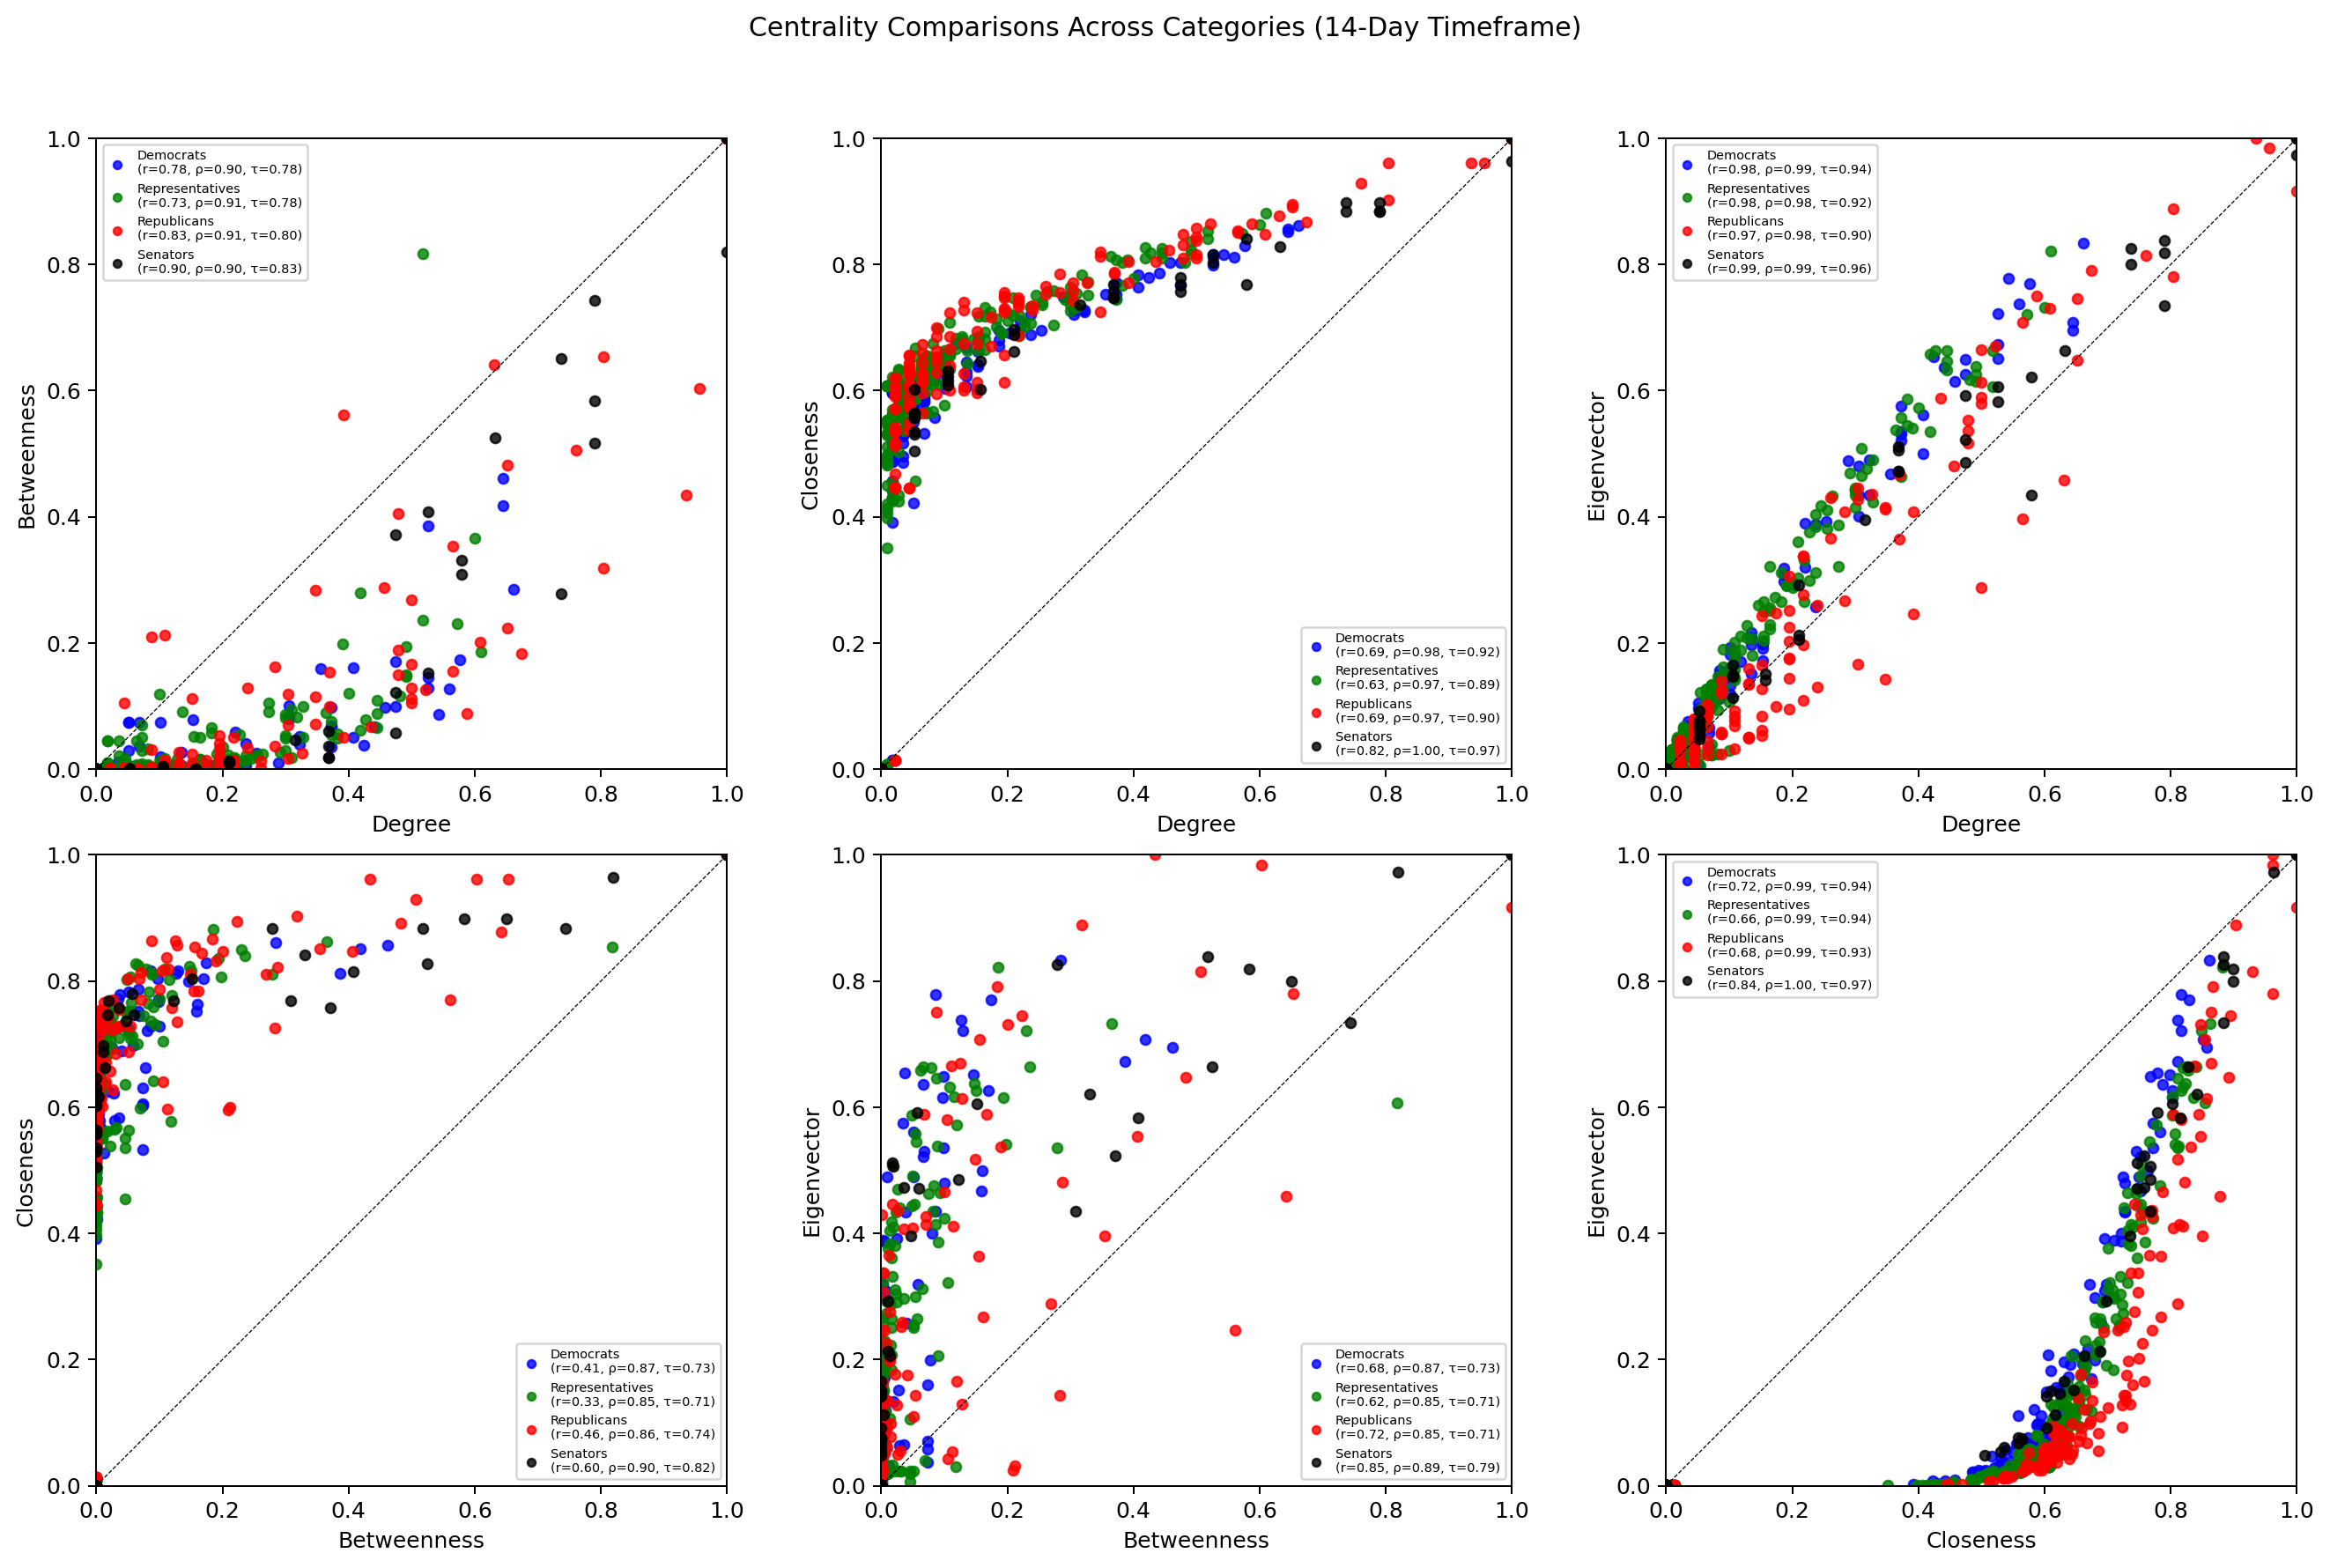

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import networkx as nx

categories = {
    'Democrats': '../data/internal/networks/democrat_members_14days.gml',
    'Representatives': '../data/internal/networks/representatives_14days.gml',
    'Republicans': '../data/internal/networks/republican_members_14days.gml',
    'Senators': '../data/internal/networks/senators_14days.gml'
}

centralities_categories = {}

for category, dataset_file in categories.items():
    G = nx.read_gml(dataset_file, label='id')
    degree, betwns, closen, eigenv, degree_dic, betwns_dic, closen_dic, eigenv_dic = calculate_centralities(G)
    centralities_categories[category] = {
        'degree': degree,
        'betweenness': betwns,
        'closeness': closen,
        'eigenvector': eigenv
    }

plot_pairs = [
    ('degree', 'betweenness', 'Degree', 'Betweenness'),
    ('degree', 'closeness', 'Degree', 'Closeness'),
    ('degree', 'eigenvector', 'Degree', 'Eigenvector'),
    ('betweenness', 'closeness', 'Betweenness', 'Closeness'),
    ('betweenness', 'eigenvector', 'Betweenness', 'Eigenvector'),
    ('closeness', 'eigenvector', 'Closeness', 'Eigenvector')
]

fig, axs = plt.subplots(2, 3, figsize=(15, 10), dpi=180)
fig.suptitle('Centrality Comparisons Across Categories (14-Day Timeframe)')

colors = {'Democrats': 'blue', 'Representatives': 'green', 'Republicans': 'red', 'Senators': 'black'}

for ax, (x_key, y_key, labex, labey) in zip(axs.flatten(), plot_pairs):
    for category, color in colors.items():
        x = centralities_categories[category][x_key]
        y = centralities_categories[category][y_key]

        pea = sp.stats.pearsonr(x, y)[0]
        spear = sp.stats.spearmanr(x, y)[0]
        kend = sp.stats.kendalltau(x, y)[0]

        label = f"{category}\n(r={pea:.2f}, ρ={spear:.2f}, τ={kend:.2f})"
        ax.scatter(x / np.max(x), y / np.max(y), label=label, s=20, alpha=0.8, marker='o', color=color)

    ax.set_xlabel(labex)
    ax.set_ylabel(labey)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.axline((0, 0), slope=1, color='black', linestyle='--', linewidth=0.5)
    
    ax.legend(loc='best', frameon=True, shadow=False, ncol=1, fontsize='xx-small', handlelength=1.5, markerscale=0.8)

fig.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()


**Degree Centrality:**
All groups show a strong linear trend between degree and other centrality measures, especially closeness and eigenvector.
Democrats and Republicans exhibit a higher spread in degree values compared to Senators and Representatives, likely reflecting their greater overall connectivity in the network.
Senators have fewer high-degree nodes, which aligns with their smaller group size compared to Representatives.

**Betweenness Centrality:**
Betweenness centrality displays greater variability compared to degree and eigenvector, especially among Republicans and Representatives.
Democrats and Senators show more consistent correlations between betweenness and degree, indicating that their network roles are more evenly distributed.
Republicans display lower correlations between betweenness and closeness, suggesting more fragmented pathways.

**Closeness Centrality:**
Closeness centrality is highly correlated with degree across all groups, which suggests that nodes with more connections also have shorter paths to other nodes.
Senators and Representatives exhibit higher clustering near the upper end of closeness, indicating more compact networks within their groups.

**Eigenvector Centrality:**
Eigenvector centrality shows strong correlations with degree across all groups, especially for Senators and Democrats, reflecting their reliance on influential nodes to maintain cohesion.
Republicans display a slightly broader distribution, possibly reflecting the presence of isolated influential nodes that do not connect to other influential nodes.

Groups with higher variability in betweenness centrality, such as Republicans and Representatives, may be more vulnerable to disruptions in their networks, as their connectivity relies on fewer intermediaries.
Democrats and Senators appear more resilient, with roles more evenly distributed, making their networks less dependent on specific nodes.

## Mapping of the names with the nodes

In [9]:
all_node_to_label = {}

for dataset_file, dataset_label in datasets:
    G = nx.read_gml(dataset_file)
    node_to_label = {i: node for i, (node, data) in enumerate(G.nodes(data=True))}
    all_node_to_label[dataset_label] = node_to_label

In [10]:
top_degree = {}
top_betweenness = {}
top_closeness = {}
top_eigenvector = {}
top_pagerank = {}


for dataset_label in all_sorted_degree_dicts:
    node_to_label = all_node_to_label[dataset_label] 

    top_degree[dataset_label] = [
        (node_to_label[node], value) for node, value in list(all_sorted_degree_dicts[dataset_label].items())[:3]
    ]
    top_betweenness[dataset_label] = [
        (node_to_label[node], value) for node, value in list(all_sorted_betwns_dicts[dataset_label].items())[:3]
    ]
    top_closeness[dataset_label] = [
        (node_to_label[node], value) for node, value in list(all_sorted_closen_dicts[dataset_label].items())[:3]
    ]
    top_eigenvector[dataset_label] = [
        (node_to_label[node], value) for node, value in list(all_sorted_eigenv_dicts[dataset_label].items())[:3]
    ]

print("Top 3 Degree Centralities:")
for label, values in top_degree.items():
    print(f"{label}: {values}")

print("\nTop 3 Betweenness Centralities:")
for label, values in top_betweenness.items():
    print(f"{label}: {values}")

print("\nTop 3 Closeness Centralities:")
for label, values in top_closeness.items():
    print(f"{label}: {values}")

print("\nTop 3 Eigenvector Centralities:")
for label, values in top_eigenvector.items():
    print(f"{label}: {values}")



Top 3 Degree Centralities:
All_members_14days: [('Josh Gottheimer', 0.3778409090909091), ('Sheldon Whitehouse', 0.2556818181818182), ('Pat Roberts', 0.25)]
All_members_7days: [('Josh Gottheimer', 0.3380681818181818), ('Pat Roberts', 0.21022727272727273), ('Sheldon Whitehouse', 0.20738636363636365)]
All_members_1day: [('Josh Gottheimer', 0.20170454545454547), ('David Perdue', 0.13068181818181818), ('Pat Roberts', 0.10227272727272728)]
Democrat_members_14days: [('Josh Gottheimer', 0.37341772151898733), ('Alan S. Lowenthal', 0.24683544303797467), ('Sheldon Whitehouse', 0.24050632911392406)]
Democrat_members_7days: [('Josh Gottheimer', 0.3481012658227848), ('Lois Frankel', 0.20253164556962025), ('Alan S. Lowenthal', 0.20253164556962025)]
Democrat_members_1day: [('Josh Gottheimer', 0.22151898734177214), ('Gilbert Cisneros', 0.13291139240506328), ('Lois Frankel', 0.10759493670886076)]
Representatives_14days: [('Josh Gottheimer', 0.37800687285223367), ('Alan S. Lowenthal', 0.23024054982817868

## Insights into Congressional Trading

The analysis of trading networks among Congressional members shows how certain individuals play key roles in connecting and influencing others. Members like Josh Gottheimer, Sheldon Whitehouse, and Pat Roberts are highly connected and often act as central hubs, making them important for the flow of information and decisions within the network. Democrats and Senators generally show more balanced roles, where many members contribute to the network's structure, making their groups more stable and less reliant on specific individuals. On the other hand, Republicans and Representatives rely more on a few key members, which could make their networks more vulnerable if those individuals change their behavior. Overall, the study highlights how trading patterns are shaped by group dynamics and individual roles, helping us understand how information and decisions spread within these networks.